<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#VoiceSauce-feature-set" data-toc-modified-id="VoiceSauce-feature-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>VoiceSauce feature set</a></span><ul class="toc-item"><li><span><a href="#VoiceSauce-data-base-LR-model" data-toc-modified-id="VoiceSauce-data-base-LR-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>VoiceSauce data base LR model</a></span></li><li><span><a href="#Augmented-data" data-toc-modified-id="Augmented-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Augmented data</a></span></li><li><span><a href="#Random-baseline-model-I" data-toc-modified-id="Random-baseline-model-I-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random baseline model I</a></span></li><li><span><a href="#Random-baseline-model-II" data-toc-modified-id="Random-baseline-model-II-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Random baseline model II</a></span></li><li><span><a href="#Augmented-data-base-model-I" data-toc-modified-id="Augmented-data-base-model-I-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Augmented data base model I</a></span></li><li><span><a href="#Augmented-data-base-model-II" data-toc-modified-id="Augmented-data-base-model-II-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Augmented data base model II</a></span></li><li><span><a href="#PCA-models" data-toc-modified-id="PCA-models-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>PCA models</a></span></li><li><span><a href="#Building-a-machine-learning-Pipeline-I" data-toc-modified-id="Building-a-machine-learning-Pipeline-I-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Building a machine learning Pipeline I</a></span></li><li><span><a href="#Building-a-machine-learning-pipeline-II" data-toc-modified-id="Building-a-machine-learning-pipeline-II-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Building a machine learning pipeline II</a></span></li><li><span><a href="#Augmented-data-PCA-model-I" data-toc-modified-id="Augmented-data-PCA-model-I-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Augmented data PCA model I</a></span></li><li><span><a href="#Augmented-data-PCA-model-II" data-toc-modified-id="Augmented-data-PCA-model-II-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Augmented data PCA model II</a></span></li><li><span><a href="#Linear-Discriminant-Analysis-I" data-toc-modified-id="Linear-Discriminant-Analysis-I-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Linear Discriminant Analysis I</a></span></li><li><span><a href="#Linear-Discriminant-Analysis-II" data-toc-modified-id="Linear-Discriminant-Analysis-II-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Linear Discriminant Analysis II</a></span></li><li><span><a href="#Comparison-of-LDA-and-PCA-2D-projection" data-toc-modified-id="Comparison-of-LDA-and-PCA-2D-projection-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Comparison of LDA and PCA 2D projection</a></span></li></ul></li><li><span><a href="#Combined-feature-set-(not-included-in-article)" data-toc-modified-id="Combined-feature-set-(not-included-in-article)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Combined feature set (not included in article)</a></span><ul class="toc-item"><li><span><a href="#Full-model-(multicollinearity)" data-toc-modified-id="Full-model-(multicollinearity)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Full model (multicollinearity)</a></span></li><li><span><a href="#PCA-model" data-toc-modified-id="PCA-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>PCA model</a></span></li></ul></li></ul></div>

# Data Exploration and Analysis (ICPhS 2023)

## Set up

In [ ]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dir='/content/drive/My Drive/wp1'

Mounted at /content/drive


## VoiceSauce feature set


In [ ]:
data = pd.read_csv('/content/drive/My Drive/wp1/vsdatas.csv',na_filter = False)

In [ ]:
data = data.loc[~data['comb_no'].isin(['S02R04','S02R05','S02R06'])]

### VoiceSauce data base LR model

In [ ]:
# Voice Sauce full feature set

sessions = set(data['comb_no'].unique().tolist())

scores = []
f1 = []
pos_variables = []
neg_variables = []
Y_tests = []
Y_preds= []

for sp in tqdm(sessions):
  # define training and test sets
    train_sp = list(sessions.difference([sp]))
    train_data = data[data['comb_no'].isin(train_sp)]
    test_data = data[data['comb_no'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,3:63]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,3:63]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=5000)
    lr.fit(x_train_scaled,y_train)
    
    x_test = scaler.transform(x_test)
    scores.append(lr.score(x_test,y_test))
    
    y_pred = lr.predict(x_test)
    f1.append(f1_score(y_test, y_pred,average='macro'))

    Y_tests.append(y_test)
    Y_preds.append(y_pred)

    idx = np.argsort(lr.coef_[0])
    pos_variables.append((x_train.columns[idx[-10:]].tolist(),np.sort(lr.coef_[0][idx[-10:]])))
    neg_variables.append((x_train.columns[idx[0:10]].tolist(),np.sort(lr.coef_[0][idx[0:10]])))

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 22%|██▏       | 2/9 [00:01<00:06,  1.07it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 33%|███▎      | 3/9 [00:02<00:05,  1.05it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 44%|████▍     | 4/9 [00:03<00:04,  1.03it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 56%|█████▌    | 5/9 [00:04<00:03,  1.03it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWar

In [ ]:
print(np.mean(scores))
print(np.mean(f1))

1.0
1.0



Test confusion_matrix


Text(33.0, 0.5, 'True')

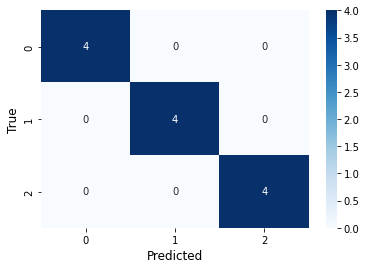

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
vs_corr = x_train.corr()

In [ ]:
vs_corr.to_csv('/content/drive/My Drive/wp1/vs_corr.csv')

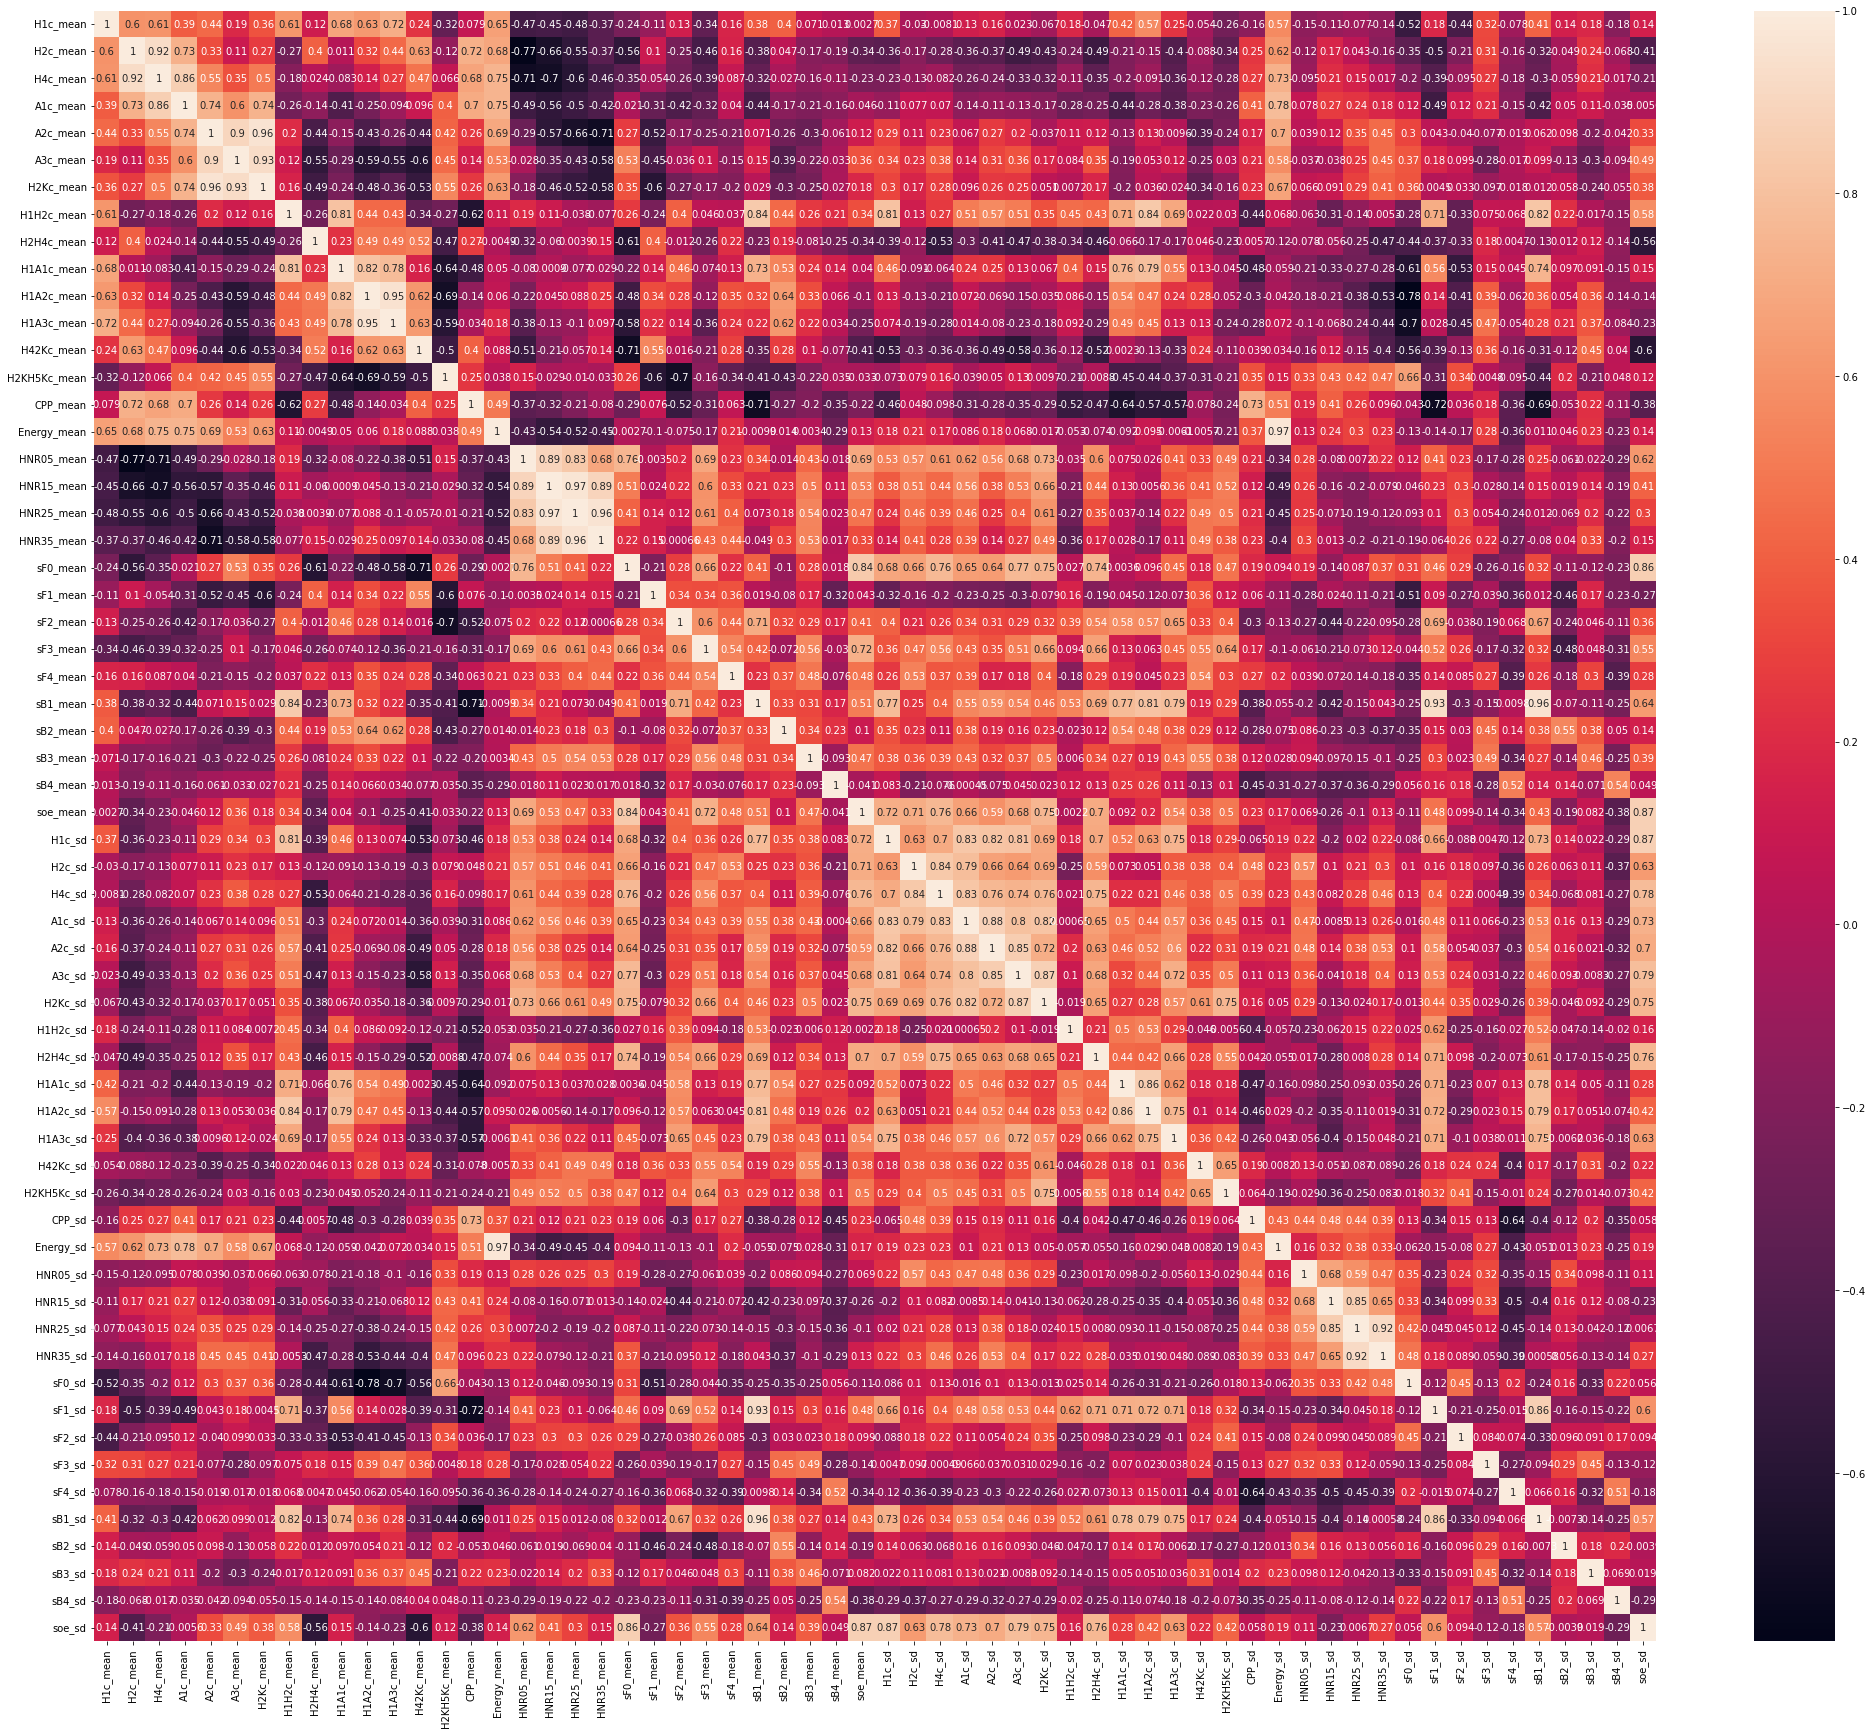

In [ ]:
fig = plt.figure(figsize=(35, 30))
sns.heatmap(x_train.corr(), annot=True)

In [ ]:
fig.savefig('/content/drive/My Drive/wp1/heatmapvs.png', dpi=300)

In [ ]:
lr.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.82937119,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         3.22181545,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.92077348,  0.13083906,  1.22566263,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24455658,  0.        ,  0.        ,  0.        ,
        -0.59971287,  0.59979662,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-2.38299682,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.41764988,  0.

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'BRT': 0, 'CRK': 1, 'MOD': 2}


In [ ]:
pos_variables

[(['sF0_mean',
   'sF1_mean',
   'sB1_sd',
   'H2H4c_sd',
   'sF2_mean',
   'sF1_sd',
   'H1A1c_mean',
   'H1H2c_sd',
   'H1A1c_sd',
   'sB1_mean'],
  array([0.        , 0.        , 0.03679202, 0.04410526, 0.09492785,
         0.10199966, 0.57424031, 0.91126031, 1.18632078, 3.35608436])),
 (['sF2_mean',
   'sF3_mean',
   'sF4_mean',
   'Energy_mean',
   'soe_sd',
   'H1A1c_mean',
   'sF1_sd',
   'H1H2c_sd',
   'H1A1c_sd',
   'sB1_mean'],
  array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.77279006, 0.83396865, 1.09056348, 1.3301398 , 2.37248835])),
 (['soe_sd',
   'HNR25_mean',
   'HNR15_mean',
   'HNR35_mean',
   'H2H4c_sd',
   'H1A1c_mean',
   'sF1_sd',
   'H1H2c_sd',
   'H1A1c_sd',
   'sB1_mean'],
  array([0.        , 0.        , 0.        , 0.        , 0.34766437,
         0.66512387, 0.71290908, 0.98106699, 1.17390979, 2.66727467])),
 (['soe_sd',
   'HNR25_mean',
   'HNR15_mean',
   'HNR35_mean',
   'H2H4c_sd',
   'sF1_sd',
   'H1H2c_sd',
   'H1A1c_mean

In [ ]:
neg_variables

[(['sF0_sd',
   'HNR05_sd',
   'sF2_sd',
   'H1c_mean',
   'sB4_sd',
   'H1c_sd',
   'H2c_sd',
   'H4c_sd',
   'A1c_sd',
   'A2c_sd'],
  array([-0.61422647, -0.44428738, -0.00335479,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ])),
 (['sF2_sd',
   'HNR05_sd',
   'sF0_sd',
   'H1c_mean',
   'H1c_sd',
   'H2c_sd',
   'H4c_sd',
   'A1c_sd',
   'A2c_sd',
   'A3c_sd'],
  array([-0.35480105, -0.16872438, -0.10346842,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ])),
 (['sF0_sd',
   'HNR05_sd',
   'sB2_sd',
   'sF2_sd',
   'H1c_mean',
   'H1c_sd',
   'H2c_sd',
   'H4c_sd',
   'A1c_sd',
   'A2c_sd'],
  array([-0.54428829, -0.40220268, -0.0275248 , -0.01733385,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ])),
 (['sF0_sd',
   'HNR05_sd',
   'H1c_mean',
   'H1c_sd',
   'H2c_sd',
   'H4c_sd',
   'A1c_sd',
   'A2c_sd',
   'A3c_sd',
   'H2Kc_sd'],
  arra

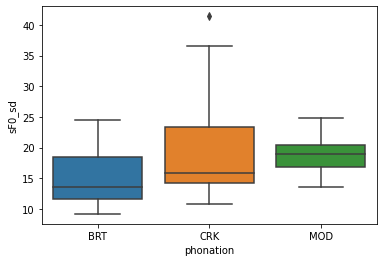

In [ ]:
# plots sF0
sns.boxplot(x='phonation', y='sF0_sd', data=data)

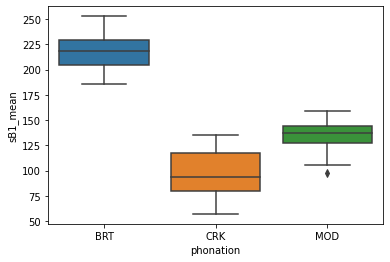

In [ ]:
# plots sB1_mean
sns.boxplot(x='phonation', y='sB1_mean', data=data)

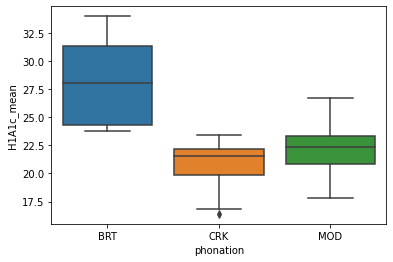

In [ ]:
# plots H1A1c_mean
sns.boxplot(x='phonation', y='H1A1c_mean', data=data)

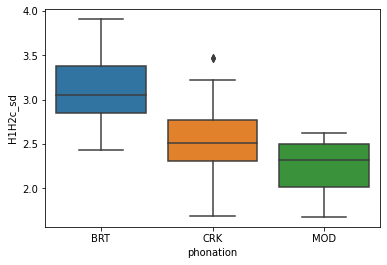

In [ ]:
# plots H1H2c_sd
sns.boxplot(x='phonation', y='H1H2c_sd', data=data)

### Augmented data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/wp1/vsdatasint_nosoe.csv',na_filter = False)
data = data.loc[~data['rs'].isin(['S02R04','S02R05','S02R06'])]
data

participant                      Filename phonation interval   H1c_mean  \
0         P0001  AC_P0001_S01_R01_BRT_HDM.mat       BRT        a  16.126811   
1         P0001  AC_P0001_S01_R01_BRT_HDM.mat       BRT        b  14.922202   
2         P0001  AC_P0001_S01_R01_BRT_HDM.mat       BRT        c  16.610802   
3         P0001  AC_P0001_S01_R01_BRT_HDM.mat       BRT        d  18.044823   
4         P0001  AC_P0001_S01_R01_BRT_HDM.mat       BRT        e  18.169155   
..          ...                           ...       ...      ...        ...   
697       P0004  AC_P0004_S03_R03_MOD_HDM.mat       MOD        b  15.699015   
698       P0004  AC_P0004_S03_R03_MOD_HDM.mat       MOD        c  15.535712   
699       P0004  AC_P0004_S03_R03_MOD_HDM.mat       MOD        d  17.499325   
700       P0004  AC_P0004_S03_R03_MOD_HDM.mat       MOD        e  15.003134   
701       P0004  AC_P0004_S03_R03_MOD_HDM.mat       MOD        f  15.130560   

      H2c_mean  H4c_mean   A1c_mean   A2c_mean  A3c_mean  ...      sF3_sd  \
0     4.443059 -0.112041 -11.467267 -10.094315 -1.181237  ...  290.526258   
1     3.847778 -3.113911 -16.233187 -15.887453 -8.517749  ...  256.240059   
2     5.388827 -2.530399 -17.341007 -15.475406 -6.873831  ...  194.797725   
3     6.894061 -1.579303 -14.783139 -16.234922 -4.856212  ...  267.265355   
4     6.157108 -0.264474 -16.344088 -16.851381 -7.165918  ...  244.130557   
..         ...       ...        ...        ...       ...  ...         ...   
697  10.152903  1.957719  -7.538163 -12.340193 -8.041816  ...  315.327874   
698  10.445065  2.631730  -9.619775 -14.873524 -7.127254  ...  391.665376   
699  12.125758  4.156075  -5.923121 -12.405755 -4.190780  ...  446.549735   
700  10.775394  2.749792  -7.902518 -14.636743 -5.706246  ...  366.066255   
701   8.661292  1.109664  -9.725357 -13.923312 -6.778042  ...  496.550580   

         sF4_sd      sB1_sd      sB2_sd      sB3_sd      sB4_sd  session  \
0    461.096428  169.943927  236.018655  175.241760  214.152636      S01   
1    417.844357  133.029644  170.857751  193.519834  176.821342      S01   
2    447.314141  175.989807  237.329558  174.363235  266.465317      S01   
3    536.993534  130.818743  207.481458  166.493309  230.378719      S01   
4    441.683714  194.517503  385.874137  174.908489  254.829214      S01   
..          ...         ...         ...         ...         ...      ...   
697  189.636339   87.312050  251.221982  228.000722  207.844723      S03   
698  288.469289  129.305318  245.397910  212.904208  220.231715      S03   
699  227.426830  133.816280  306.243223  222.570174  205.347595      S03   
700  181.500253   78.159472  307.840448  208.304963  206.246489      S03   
701  255.892037   74.339756  276.879002  178.736760  195.832857      S03   

     repetition  comb_no      rs  
0           R01  S01R01a  S01R01  
1           R01  S01R01b  S01R01  
2           R01  S01R01c  S01R01  
3           R01  S01R01d  S01R01  
4           R01  S01R01e  S01R01  
..          ...      ...     ...  
697         R03  S03R03b  S03R03  
698         R03  S03R03c  S03R03  
699         R03  S03R03d  S03R03  
700         R03  S03R03e  S03R03  
701         R03  S03R03f  S03R03  

[648 rows x 66 columns]

### Random baseline model I

In [ ]:
# Voice Sauce full feature set

sessions = set(data['comb_no'].unique().tolist())

scores = []
f1 = []

for sp in tqdm(sessions):
  # define training and test sets
    train_sp = list(sessions.difference([sp]))
    train_data = data[data['comb_no'].isin(train_sp)]
    test_data = data[data['comb_no'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:62]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:62]

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    
    x_test = scaler.transform(x_test)

    y_pred = np.random.randint(0,2,size=len(y_test))

    scores.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test, y_pred,average='macro'))

100%|██████████| 54/54 [00:01<00:00, 35.80it/s]


In [ ]:
print(np.mean(scores))
print(np.mean(f1))

0.32098765432098764
0.249152425078351


### Random baseline model II

In [ ]:
speakers = set(data['participant'].unique().tolist())

scores = []
f1 = []

for sp in tqdm(speakers):
  # define training and test sets
    train_sp = list(speakers.difference([sp]))
    train_data = data[data['participant'].isin(train_sp)]
    test_data = data[data['participant'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:62]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:62]

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    
    x_test = scaler.transform(x_test)

    y_pred = np.random.randint(0,2,size=len(y_test))

    scores.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test, y_pred,average='macro'))

100%|██████████| 4/4 [00:00<00:00, 68.92it/s]


In [ ]:
print(np.mean(scores))
print(np.mean(f1))

0.3395061728395062
0.2713571705106711


### Augmented data base model I

Test data is a set of unseen repetitions.

In [ ]:
sessions = set(data['rs'].unique().tolist())

train_scores = []
test_scores=[]
f1 = []
pos_variables = []
neg_variables = []
Y_tests = []
Y_preds= []

for sp in tqdm(sessions):
  # define training and test sets
    train_sp = list(sessions.difference([sp]))
    train_data = data[data['rs'].isin(train_sp)]
    test_data = data[data['rs'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:62]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:62]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    
    # Initialize the logistic regression model
    # Train the model
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=4000)
    lr.fit(x_train_scaled,y_train)
    
    # Measure accuracy
    x_test = scaler.transform(x_test)
    
    test_scores.append(lr.score(x_test, y_test))
    train_scores.append(accuracy_score(y_train, lr.predict(x_train_scaled)))

    y_pred = lr.predict(x_test)
    f1.append(f1_score(y_test, y_pred,average='macro'))

    Y_tests.extend(y_test)
    Y_preds.extend(y_pred)

    idx = np.argsort(lr.coef_[0])
    pos_variables.append((x_train.columns[idx[-10:]].tolist(),np.sort(lr.coef_[0][idx[-10:]])))
    neg_variables.append((x_train.columns[idx[0:10]].tolist(),np.sort(lr.coef_[0][idx[0:10]])))

100%|██████████| 9/9 [00:33<00:00,  3.68s/it]


In [ ]:
# report accuracy
print("Train accuracy:", np.round(np.mean(train_scores), 2))
print("Test accuracy:", np.round(np.mean(test_scores), 2))

print(np.mean(f1))

Train accuracy: 1.0
Test accuracy: 0.98
0.9815207181306757



Test confusion_matrix


Text(33.0, 0.5, 'True')

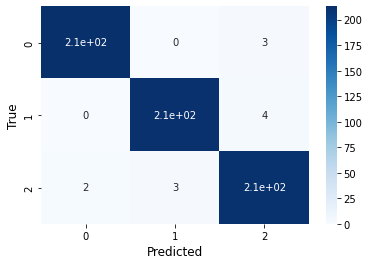

In [ ]:
# Make the confusion matrix (aggregated)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_tests, Y_preds)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


In [ ]:
pos_variables

[(['H2H4c_sd',
   'sB3_sd',
   'H1A2c_sd',
   'H1A1c_mean',
   'H1A1c_sd',
   'H1c_mean',
   'sF2_mean',
   'H1H2c_mean',
   'sF3_mean',
   'sB1_mean'],
  array([0.33821481, 0.64734821, 1.26605299, 1.35697026, 1.60104101,
         1.64399358, 1.77850003, 2.14235698, 2.29168235, 5.45118081])),
 (['H2H4c_sd',
   'A3c_mean',
   'H1A2c_sd',
   'H1A1c_mean',
   'H1c_mean',
   'sF3_mean',
   'H1A1c_sd',
   'sF2_mean',
   'H1H2c_mean',
   'sB1_mean'],
  array([0.53557605, 0.57432776, 0.87222402, 1.00251353, 1.05124246,
         1.46024644, 1.61268541, 1.8184392 , 2.53893084, 5.18329639])),
 (['sB3_sd',
   'sB2_mean',
   'H1A2c_sd',
   'H1A1c_mean',
   'H1A1c_sd',
   'sF2_mean',
   'H1c_mean',
   'H1H2c_mean',
   'sF3_mean',
   'sB1_mean'],
  array([0.59786665, 0.60267892, 0.61497295, 1.28027395, 1.3216127 ,
         1.52103817, 1.66383963, 2.24485004, 2.3602382 , 5.43454531])),
 (['A2c_sd',
   'H1c_sd',
   'sF1_sd',
   'H1c_mean',
   'H1A1c_sd',
   'sF2_mean',
   'H1H2c_mean',
   'sF3_mean',


### Augmented data base model II

Test data is a set of data from an unknowm speaker.

In [ ]:
speakers = set(data['participant'].unique().tolist())

train_scores = []
test_scores=[]
f1 = []
pos_variables = []
neg_variables = []
Y_tests = []
Y_preds= []

for sp in tqdm(speakers):
  # define training and test sets
    train_sp = list(speakers.difference([sp]))
    train_data = data[data['participant'].isin(train_sp)]
    test_data = data[data['participant'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:62]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:62]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    
    # Initialize the logistic regression model
    # Train the model
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=5000)
    lr.fit(x_train_scaled,y_train)
    
    # Measure accuracy
    x_test = scaler.transform(x_test)
    
    test_scores.append(lr.score(x_test, y_test))
    train_scores.append(accuracy_score(y_train, lr.predict(x_train_scaled)))

    y_pred = lr.predict(x_test)
    f1.append(f1_score(y_test, y_pred,average='macro'))

    Y_tests.extend(y_test)
    Y_preds.extend(y_pred)

    idx = np.argsort(lr.coef_[0])
    pos_variables.append((x_train.columns[idx[-10:]].tolist(),np.sort(lr.coef_[0][idx[-10:]])))
    neg_variables.append((x_train.columns[idx[0:10]].tolist(),np.sort(lr.coef_[0][idx[0:10]])))

100%|██████████| 4/4 [00:16<00:00,  4.06s/it]


Train accuracy: 1.0
Test accuracy: 0.79
[0.691358024691358, 0.7962962962962963, 0.7901234567901234, 0.8703703703703703]
0.7780191027654746

Test confusion_matrix


Text(33.0, 0.5, 'True')

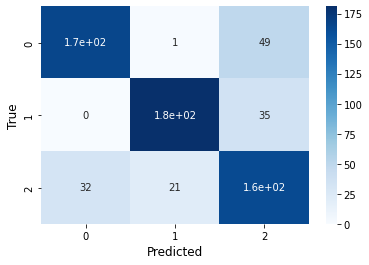

In [ ]:
# report accuracy
print("Train accuracy:", np.round(np.mean(train_scores), 2))
print("Test accuracy:", np.round(np.mean(test_scores), 2))
print(test_scores)
print(np.mean(f1))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_tests, Y_preds)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

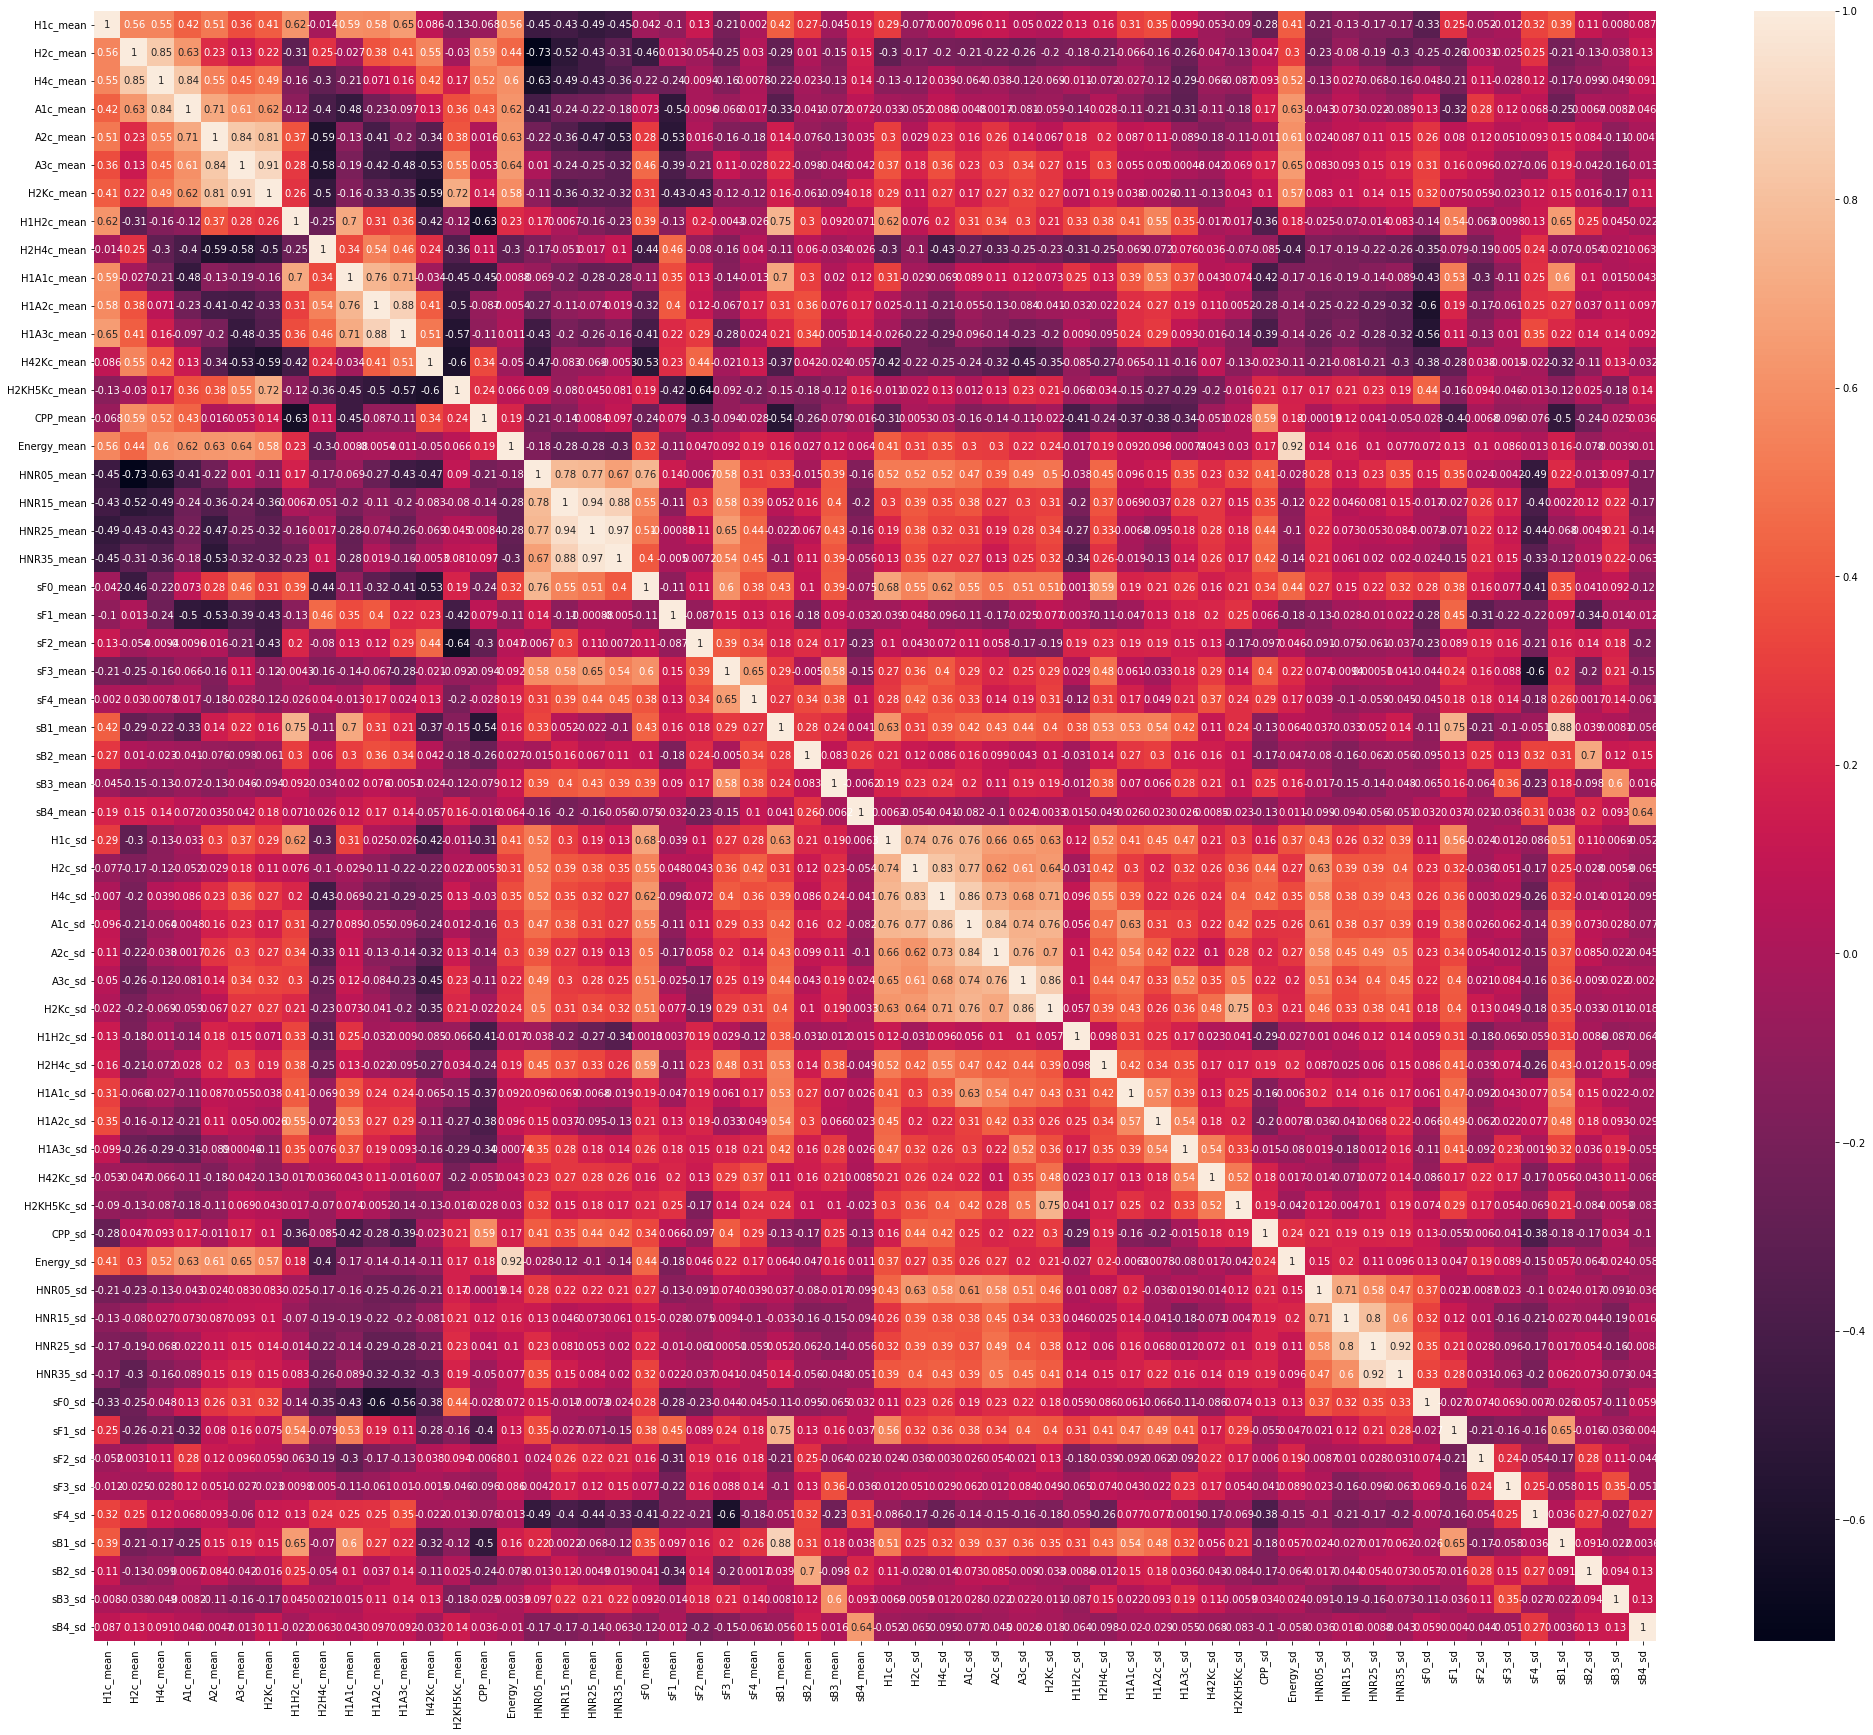

In [ ]:
fig = plt.figure(figsize=(35, 30))
sns.heatmap(x_train.corr(), annot=True)

In [ ]:
pos_variables

[(['H42Kc_mean',
   'H1A1c_sd',
   'sB3_mean',
   'sB4_mean',
   'H1H2c_sd',
   'H1c_mean',
   'sF3_mean',
   'H1A1c_mean',
   'sB1_mean',
   'H1H2c_mean'],
  array([0.        , 0.29895416, 0.32427622, 0.3486553 , 0.93669685,
         1.15786393, 1.25972968, 2.42587295, 3.18245867, 3.74159054])),
 (['sB2_mean',
   'A2c_sd',
   'H1A1c_mean',
   'H1c_mean',
   'sF3_mean',
   'H1A2c_sd',
   'H1A1c_sd',
   'H1H2c_mean',
   'sF2_mean',
   'sB1_mean'],
  array([0.2594737 , 0.32892525, 0.5252676 , 0.70832616, 0.79253732,
         1.40904406, 1.52778722, 1.58966488, 2.2364696 , 5.56998043])),
 (['A2c_sd',
   'H1H2c_mean',
   'sF1_sd',
   'sF3_mean',
   'H2KH5Kc_sd',
   'H2H4c_sd',
   'H1A1c_sd',
   'H1A1c_mean',
   'sF2_mean',
   'sB1_mean'],
  array([0.45608928, 0.4879206 , 0.50592975, 0.67248856, 0.76841955,
         0.87812098, 1.10281836, 1.55576173, 2.00667015, 5.62369812])),
 (['A2c_mean',
   'H1A2c_sd',
   'sB3_sd',
   'H1A1c_sd',
   'H1A1c_mean',
   'H1c_mean',
   'H1H2c_mean',
   'sF3

In [ ]:
neg_variables

[(['H2H4c_mean',
   'sF0_sd',
   'soe_mean',
   'sF3_sd',
   'sF2_sd',
   'sB4_sd',
   'H1c_sd',
   'H2c_sd',
   'H4c_sd',
   'A1c_sd'],
  array([-0.77639458, -0.01953497,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ])),
 (['sF0_sd',
   'HNR35_sd',
   'sF2_sd',
   'H42Kc_sd',
   'sB4_sd',
   'sF3_sd',
   'H2c_sd',
   'HNR05_sd',
   'H1A3c_sd',
   'soe_mean'],
  array([-1.68465746, -0.53243039, -0.38371883, -0.35549934, -0.34272938,
         -0.21079478, -0.19438407, -0.10035395, -0.03377943,  0.        ])),
 (['sF0_sd',
   'sF2_sd',
   'CPP_mean',
   'sF3_sd',
   'H2c_sd',
   'sF4_sd',
   'sB4_sd',
   'A3c_sd',
   'H2H4c_mean',
   'HNR05_sd'],
  array([-2.39669621, -1.36824757, -0.83412098, -0.76033971, -0.57101693,
         -0.48278051, -0.45680949, -0.3674082 , -0.26311883, -0.18306736])),
 (['sF0_sd',
   'sF2_sd',
   'sF4_sd',
   'HNR15_sd',
   'sF3_sd',
   'sF1_mean',
   'sB4_mean',
   'sB4_sd',
   'H1c_sd',
   'H2c

### PCA models

PCA Overview
Total: 58 components
----------------------------------------
Mean explained variance: 0.017
----------------------------------------
    explained variance  cumulative
1             0.193386    0.193386
2             0.151633    0.345019
3             0.121759    0.466778
4             0.088967    0.555745
5             0.060086    0.615831
6             0.045391    0.661222
7             0.039815    0.701038
8             0.032293    0.733331
9             0.026174    0.759505
10            0.025290    0.784795
11            0.022069    0.806864
12            0.020158    0.827022
13            0.015878    0.842900
14            0.014960    0.857861
15            0.013641    0.871501
16            0.012542    0.884043
17            0.010144    0.894187
18            0.009099    0.903286
19            0.008706    0.911992
20            0.008048    0.920040
----------------------------------------
Eigenvalues:
[1.12337207e+01 8.80830058e+00 7.07293560e+00 5.16807221e+00
 3.

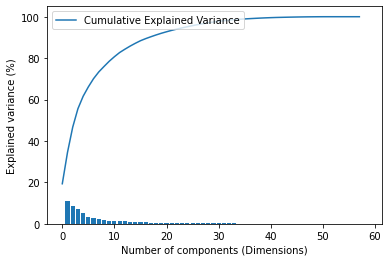

In [ ]:
# Selecting the best number of PCs for our data
# PCA of all data

x = data.iloc[:,4:62]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA()
pca.fit(x_scaled)

#Basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100),
         label="Cumulative Explained Variance")
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.legend(loc='upper left')

The first 10 components together capture about 78.5% variability in the data. First 15 components: 87.2%. First 18 components: 90%.

Now running PCA again with 15 components.

According to Pipeline I and II, four PCA components can achieve very good prediction. We can run PCA again with only 4 / 5 components.



### Building a machine learning Pipeline I

(no cross validation atm)



Best parameter (CV score=0.932):
{'pca__n_components': 30, 'regressor__C': 0.7196856730011519}


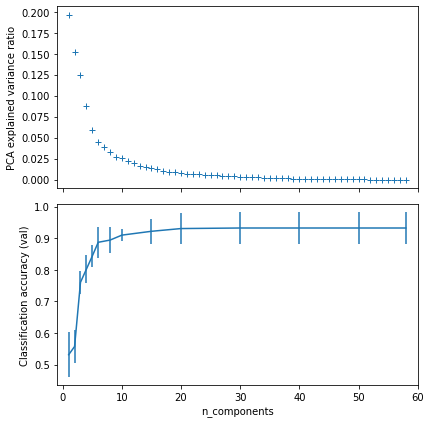

In [ ]:
# Code source: Gaël Varoquaux, modified by Jaques Grobler
# Modified for documentation by Chenzi Xu
# License: BSD 3 clause

# train and test set
sessions = set(data['rs'].unique().tolist())
le = LabelEncoder()

test = data[data['rs'] == 'S03R03'] # use 'S03R03' as a test set
train = data[data['rs'].isin(list(sessions.difference(['S03R03'])))] 

x_train = train.iloc[:,4:62]
y_train = train['phonation'].tolist()
y_train = le.fit_transform(y_train)

x_test = test.iloc[:,4:62]
y_test = test['phonation'].tolist()
y_test = le.transform(y_test)

# Construct pipeline
scaler = StandardScaler()
pca = PCA()
lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',max_iter=4000)

pipe = Pipeline([("scaler", scaler), ("pca", pca), ("regressor", lr)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 58],
    "regressor__C": np.logspace(-1, 2, 8),
}

# We use a GridSearchCV to set the dimensionality of the PCA
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(x_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
x_train_scaled  = scaler.fit_transform(x_train)
pca.fit(x_train_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

# ax0.axvline(
#     search.best_estimator_.named_steps["pca"].n_components,
#     linestyle=":",
#     label="n_components chosen",
# )
# ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 60)

plt.tight_layout()

fig.savefig("/content/drive/My Drive/wp1/pca1.png", dpi=300)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[1.96539328e-01 1.52229921e-01 1.25055762e-01 8.76191661e-02
 5.89027439e-02 4.50485598e-02 3.85250041e-02 3.23520070e-02
 2.64046028e-02 2.57024504e-02 2.18077669e-02 1.99280038e-02
 1.59533196e-02 1.48989616e-02 1.32941615e-02 1.23896257e-02
 1.05251401e-02 8.84825698e-03 8.45865172e-03 8.03535345e-03
 7.12655782e-03 6.63027064e-03 6.07073586e-03 5.69401282e-03
 5.51339969e-03 5.13571125e-03 4.63735317e-03 4.25864308e-03
 4.02061150e-03 3.59801186e-03 3.38169668e-03 2.73415833e-03
 2.59036851e-03 2.39252098e-03 1.92521458e-03 1.53749227e-03
 1.40120101e-03 1.30043310e-03 1.19847210e-03 1.01706938e-03
 9.38748680e-04 8.41693385e-04 6.01056878e-04 5.55428575e-04
 5.29516216e-04 4.57603964e-04 4.07204588e-04 3.31075013e-04
 2.67440626e-04 2.30327052e-04 1.19624822e-04 3.75333494e-05
 9.19996780e-09 5.21741764e-09 4.90832661e-09 3.55947589e-09
 1.80361667e-09 6.65982320e-10]


### Building a machine learning pipeline II

Best parameter (CV score=0.965):
{'pca__n_components': 50, 'regressor__C': 13.894954943731374}


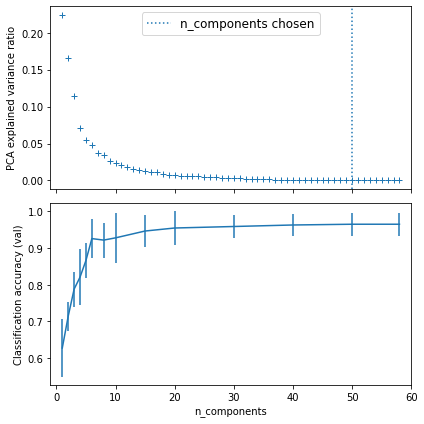

In [ ]:
# train and test set
speakers = set(data['participant'].unique().tolist())
le = LabelEncoder()

test = data[data['participant'] == 'P0003'] # use 'P0003' as a test set
train = data[data['participant'].isin(list(speakers.difference(['P0003'])))] 

x_train = train.iloc[:,4:62]
y_train = train['phonation'].tolist()
y_train = le.fit_transform(y_train)

x_test = test.iloc[:,4:62]
y_test = test['phonation'].tolist()
y_test = le.transform(y_test)

# Construct pipeline
scaler = StandardScaler()
pca = PCA()
lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',max_iter=4000)

pipe = Pipeline([("scaler", scaler), ("pca", pca), ("regressor", lr)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 58],
    "regressor__C": np.logspace(-1, 2, 8),
}

# We use a GridSearchCV to set the dimensionality of the PCA
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(x_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
x_train_scaled  = scaler.fit_transform(x_train)
pca.fit(x_train_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 60)

plt.tight_layout()
fig.savefig("/content/drive/My Drive/wp1/pca2.png", dpi=300)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[2.32445492e-01 1.62898770e-01 1.12319447e-01 6.98924766e-02
 5.47571409e-02 4.81151014e-02 3.59350387e-02 3.30721420e-02
 2.53200885e-02 2.33440123e-02 2.12082138e-02 1.78811426e-02
 1.56217859e-02 1.49506269e-02 1.24902218e-02 1.16941667e-02
 1.07430394e-02 9.35159944e-03 7.75708766e-03 7.50814267e-03
 6.39642884e-03 6.10130968e-03 5.91809023e-03 5.33885075e-03
 4.64410847e-03 4.38246602e-03 4.10699455e-03 3.85489821e-03
 3.61825985e-03 3.20444048e-03 3.02386679e-03 2.64519804e-03
 2.42755831e-03 2.34588118e-03 1.90799886e-03 1.72761367e-03
 1.45435041e-03 1.27217946e-03 1.14066779e-03 9.97739277e-04
 9.42067831e-04 8.55344175e-04 7.99649064e-04 6.28712852e-04
 5.13372578e-04 4.60495596e-04 4.11875936e-04 3.81167050e-04
 3.19269691e-04 3.05086869e-04 2.52843102e-04 1.63683542e-04
 1.14618464e-04 3.71476257e-05 1.19451644e-08 6.13171142e-09
 4.46361150e-09 3.45789155e-09 1.70733379e-09 4.64210640e-10]


### Augmented data PCA model I

In [ ]:
sessions = set(data['rs'].unique().tolist())

train_scores = []
test_scores=[]
f1 = []
Y_tests = []
Y_preds= []
PCA_var = []

for sp in tqdm(sessions):
  # define training and test sets
    train_sp = list(sessions.difference([sp]))
    train_data = data[data['rs'].isin(train_sp)]
    test_data = data[data['rs'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:62]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:62]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)

    # Apply PCA
    pca = PCA(n_components=5)
    x_train_pca = pca.fit_transform(x_train_scaled)

    # Initialize the logistic regression model
    # Train the model
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=4000)
    lr.fit(x_train_pca,y_train)
    
    # Measure accuracy
    x_test = scaler.transform(x_test)
    x_test_pca = pca.transform(x_test)

    test_scores.append(lr.score(x_test_pca, y_test))
    train_scores.append(accuracy_score(y_train, lr.predict(x_train_pca)))

    y_pred = lr.predict(x_test_pca)
    f1.append(f1_score(y_test, y_pred, average='macro'))
    PCA_var.append(pca.explained_variance_ratio_.sum())

    Y_tests.extend(y_test)
    Y_preds.extend(y_pred)

    idx = np.argsort(lr.coef_[0])

100%|██████████| 9/9 [00:03<00:00,  2.98it/s]


In [ ]:
# pipe method
# sessions = set(data['rs'].unique().tolist())

# train_scores = []
# test_scores=[]
# f1 = []
# Y_tests = []
# Y_preds= []
# PCA_var = []

# for sp in tqdm(sessions):
#   # define training and test sets
#     train_sp = list(sessions.difference([sp]))
#     train_data = data[data['rs'].isin(train_sp)]
#     test_data = data[data['rs'] == sp]
    
#     # Encoding of labels
#     y_train = train_data['phonation'].tolist()
#     le = LabelEncoder()
#     y_train = le.fit_transform(y_train)
    
#     y_test = test_data['phonation'].tolist()
#     y_test = le.transform(y_test)

#     x_train = train_data.iloc[:,4:64]
#     x_test = test_data.iloc[:,4:64]

#     # scaler = StandardScaler()
#     # x_train = scaler.fit_transform(x_train)
#     # x_test = scaler.transform(x_test)
    
#     # Construct pipeline
#     scaler = StandardScaler()
#     pca = PCA(n_components=5)
#     lr = LogisticRegression(penalty='l1',solver='saga',
#                             multi_class='multinomial',C=10, max_iter=4000)

#     pipe = Pipeline([("scaler", scaler), ("pca", pca), ("regressor", lr)])
    
#     pipe.fit(x_train, y_train)
    
#     # Measure accuracy

#     test_scores.append(pipe.score(x_test, y_test))

#     y_pred = pipe.predict(x_test)
#     f1.append(f1_score(y_test, y_pred, average='macro'))
    
#     PCA_var.append(pca.explained_variance_ratio_.sum())

#     Y_tests.extend(y_test)
#     Y_preds.extend(y_pred)

#     idx = np.argsort(lr.coef_[0])

100%|██████████| 9/9 [00:02<00:00,  3.56it/s]


Train accuracy: 0.91
Test accuracy: 0.9
f1: 0.9
[0.6153772981796026, 0.6186984195862455, 0.6204263350475345, 0.6105112703063174, 0.6143951856273604, 0.618100652321349, 0.6156646251329854, 0.6142838746365893, 0.6203469213450741]
0.62

Test confusion_matrix


Text(33.0, 0.5, 'True')

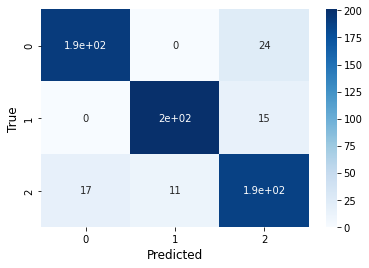

In [ ]:
# report accuracy
print("Train accuracy:", np.round(np.mean(train_scores), 2))
print("Test accuracy:", np.round(np.mean(test_scores), 2))

print("f1:", np.round(np.mean(f1),2))
print(PCA_var)
print(np.round(np.mean(PCA_var),2))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_tests, Y_preds)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
pca.explained_variance_ratio_

array([0.19284993, 0.15552851, 0.12329177, 0.08707239, 0.05995583])

In [ ]:
test_scores

[0.9444444444444444,
 0.9305555555555556,
 0.9027777777777778,
 0.8055555555555556,
 0.9444444444444444,
 0.9305555555555556,
 0.8194444444444444,
 0.9027777777777778,
 0.8888888888888888]

PCA loadings are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed.

Coefficients: 
 [[-1.20914646  0.          1.37680422  1.20661823 -0.26520259]
 [ 1.94062541 -0.08979868 -1.60838848 -1.09261645  1.80625749]
 [ 0.          0.46662016  0.          0.          0.        ]]


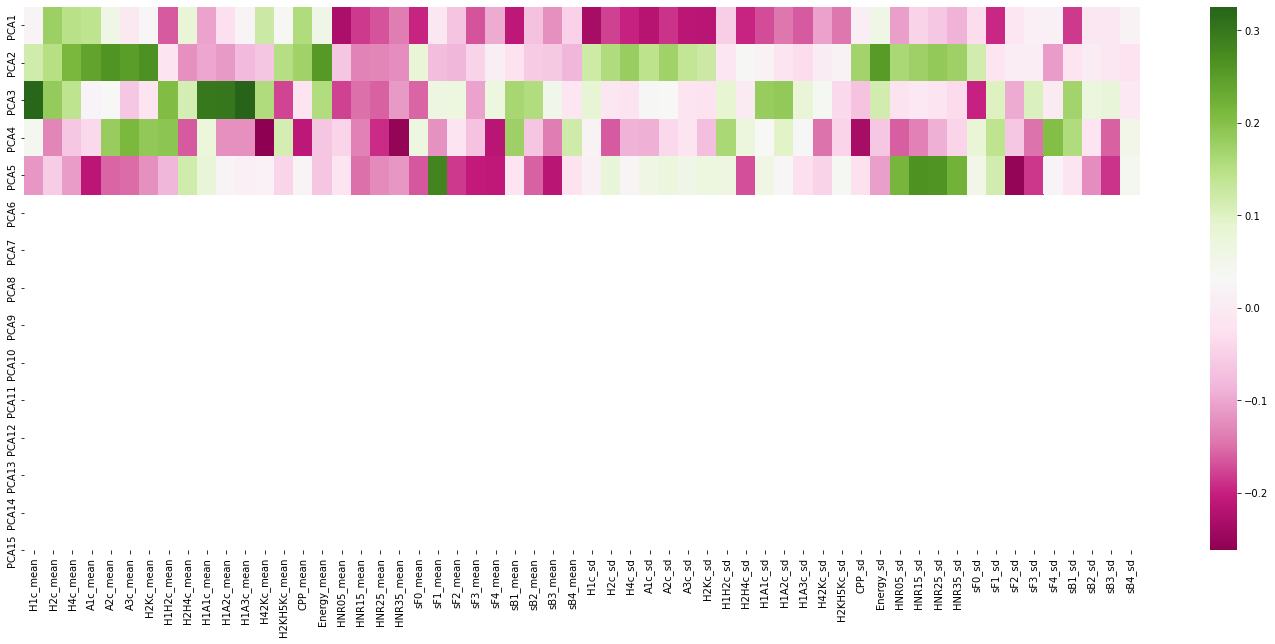

In [ ]:
# The coefficients (if 15 PCAs? not updated here)
print('Coefficients: \n', lr.coef_)

fig = plt.figure(figsize=(25, 10))
ax = sns.heatmap(pca.components_,
                 cmap='PiYG',
                 yticklabels=[ "PCA"+str(x) for x in range(1,16)],
                 xticklabels=list(x.columns))
                 #cbar_kws={"orientation": "horizontal"})
#ax.set_aspect("equal")
#fig.savefig("/content/drive/My Drive/wp1/heatmap_pca1bwr.png")

Coefficients: 
 [[-1.20914646  0.          1.37680422  1.20661823 -0.26520259]
 [ 1.94062541 -0.08979868 -1.60838848 -1.09261645  1.80625749]
 [ 0.          0.46662016  0.          0.          0.        ]]


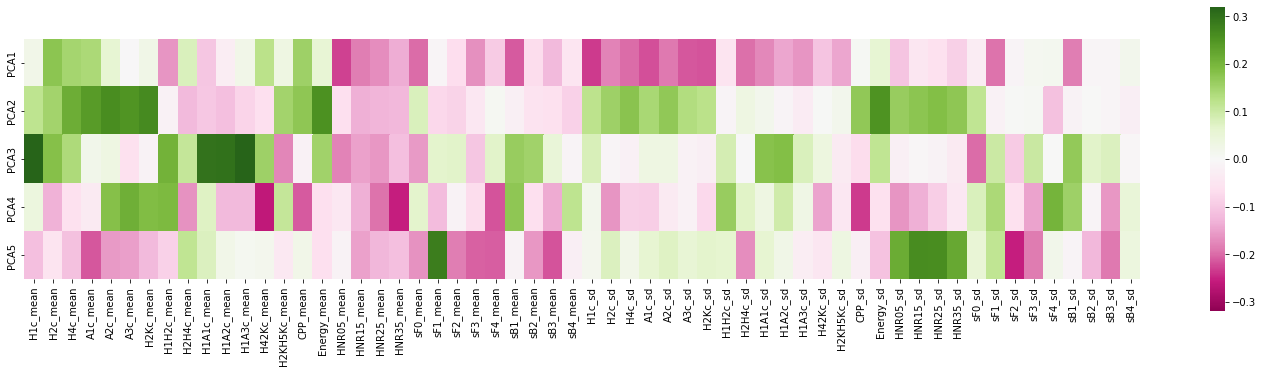

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)

fig = plt.figure(figsize=(25, 5.6))
ax = sns.heatmap(pca.components_,
                 cmap='PiYG',
                 norm=colors.Normalize(vmin=-0.32,vmax=0.32),
                 yticklabels=[ "PCA"+str(x) for x in range(1,6)],
                 xticklabels=list(x_train.columns))
                 #cbar_kws={"orientation": "horizontal"})
ax.set_aspect("2.5")
#fig.savefig("/content/drive/My Drive/wp1/heatmap_pca1short.png", dpi=300)

In [ ]:
print(pca.components_)

[[ 2.40285081e-02  1.77082415e-01  1.47603118e-01  1.40939874e-01
   5.83809584e-02 -4.01813761e-03  2.50528252e-02 -1.61495091e-01
   8.08417565e-02 -1.03261331e-01 -2.75513151e-02  2.39675198e-02
   1.23630853e-01  3.41563170e-02  1.55790231e-01  5.58767042e-02
  -2.28391266e-01 -1.83665945e-01 -1.68187678e-01 -1.36605898e-01
  -1.97831550e-01 -9.50100142e-03 -6.54047644e-02 -1.66316477e-01
  -9.65600354e-02 -2.11899490e-01 -6.99901218e-02 -1.20679801e-01
  -4.88085620e-02 -2.33471585e-01 -1.79333089e-01 -1.99979040e-01
  -2.18093517e-01 -1.88600152e-01 -2.13300442e-01 -2.16183499e-01
  -5.26054160e-02 -1.96273804e-01 -1.72762424e-01 -1.44536377e-01
  -1.62458738e-01 -1.05475003e-01 -1.43362876e-01  6.95573854e-03
   5.81363152e-02 -1.06615168e-01 -4.51750375e-02 -6.13646106e-02
  -8.84948647e-02 -3.09451976e-02 -1.94022907e-01 -1.16215477e-02
   1.19750961e-02  1.43136729e-02 -1.83600178e-01 -8.34309229e-03
  -9.48236798e-03  1.76186243e-02]
 [ 1.17600357e-01  1.50654728e-01  2.1385

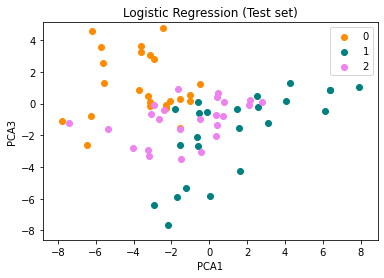

In [ ]:
X_set, y_set = x_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

#plt.contourf(X1,X2,
#             lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
#            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 2],
                c = ListedColormap(('darkorange', 'teal', 'violet'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.legend()
#plt.savefig("/content/drive/My Drive/wp1/scatter13_pca1.png", dpi=300)
plt.show()

### Augmented data PCA model II

In [ ]:
speakers = set(data['participant'].unique().tolist())
#speakers = {{'P0001', 'P0002', 'P0003', 'P0004'}}
print(speakers)

train_scores = []
test_scores=[]
f1 = []
Y_tests = []
Y_preds= []
PCA_var = []

for sp in tqdm(speakers):
  # define training and test sets
    print(sp)

    train_sp = list(speakers.difference([sp]))
    train_data = data[data['participant'].isin(train_sp)]
    test_data = data[data['participant'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:62]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:62]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)

    # Apply PCA
    pca = PCA(n_components=5)
    x_train_pca = pca.fit_transform(x_train_scaled)

    # Initialize the logistic regression model
    # Train the model
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=5000)
    lr.fit(x_train_pca,y_train)
    
    # Measure accuracy
    x_test = scaler.transform(x_test)
    x_test_pca = pca.transform(x_test)

    test_scores.append(lr.score(x_test_pca, y_test))
    train_scores.append(accuracy_score(y_train, lr.predict(x_train_pca)))

    y_pred = lr.predict(x_test_pca)
    f1.append(f1_score(y_test, y_pred, average='macro'))
    
    PCA_var.append(pca.explained_variance_ratio_.sum())

    Y_tests.extend(y_test)
    Y_preds.extend(y_pred)

    idx = np.argsort(lr.coef_[0])

{'P0003', 'P0001', 'P0002', 'P0004'}


  0%|          | 0/4 [00:00<?, ?it/s]

P0003


 25%|██▌       | 1/4 [00:00<00:01,  2.82it/s]

P0001


 50%|█████     | 2/4 [00:00<00:00,  3.36it/s]

P0002


 75%|███████▌  | 3/4 [00:01<00:00,  2.71it/s]

P0004


100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


Train accuracy: 0.92
Test accuracy: 0.78
0.775309412928585
[0.6305459514935886, 0.621689962855177, 0.6435861932901861, 0.6090960926261011]
0.63

Test confusion_matrix


Text(33.0, 0.5, 'True')

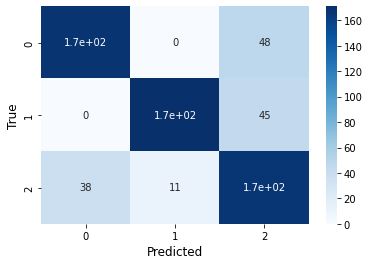

In [ ]:
# report accuracy
print("Train accuracy:", np.round(np.mean(train_scores), 2))
print("Test accuracy:", np.round(np.mean(test_scores), 2))

print(np.mean(f1))
print(PCA_var)
print(np.round(np.mean(PCA_var),2))

# Make the confusion matrix (aggregated)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_tests, Y_preds)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


Test confusion_matrix


Text(33.0, 0.5, 'True')

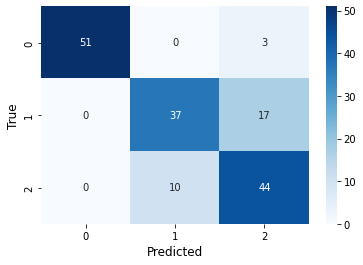

In [ ]:
# Make the confusion matrix (last iteration)
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [ ]:
test_scores

[0.7839506172839507,
 0.7716049382716049,
 0.7530864197530864,
 0.8148148148148148]

Coefficients: 
 [[-0.96838678 -0.57774519  1.42527163  0.          0.89628569]
 [ 2.51941865  0.         -2.85986632  0.92601847 -1.82061765]
 [ 0.          0.29193453  0.         -0.12713881  0.        ]]


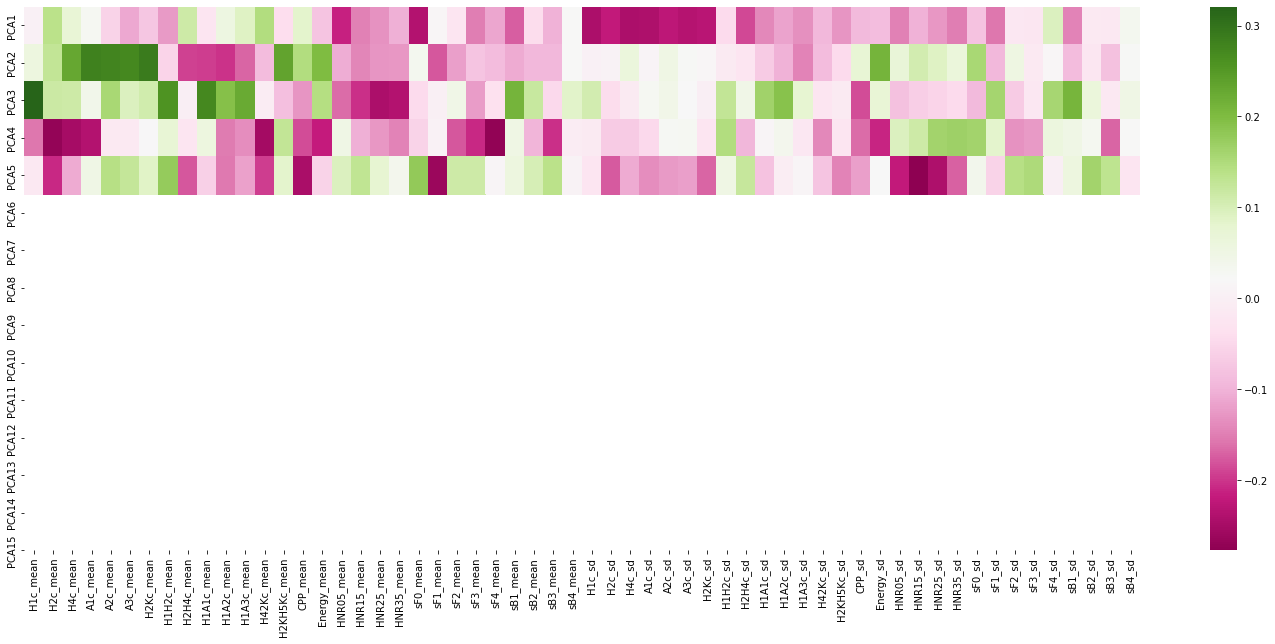

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)

fig = plt.figure(figsize=(25, 10))
ax = sns.heatmap(pca.components_,
                 cmap='PiYG',
                 yticklabels=[ "PCA"+str(x) for x in range(1,16)],
                 xticklabels=list(x_train.columns))
                 #cbar_kws={"orientation": "horizontal"})
#ax.set_aspect("equal")
#fig.savefig("/content/drive/My Drive/wp1/heatmap_pca2.png", dpi= 300)

Coefficients: 
 [[-0.96838678 -0.57774519  1.42527163  0.          0.89628569]
 [ 2.51941865  0.         -2.85986632  0.92601847 -1.82061765]
 [ 0.          0.29193453  0.         -0.12713881  0.        ]]


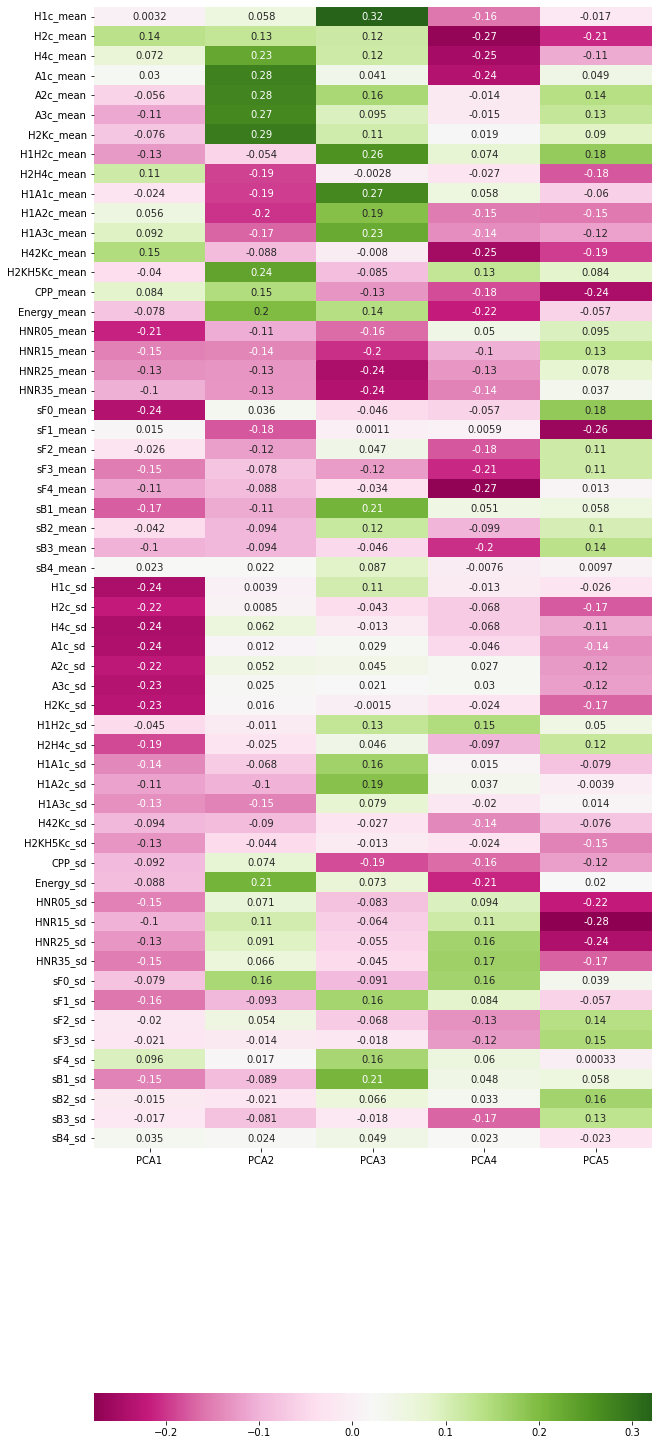

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)

fig = plt.figure(figsize=(10, 30))
ax = sns.heatmap(pca.components_.T, annot=True,
                 cmap='PiYG',
                 norm=colors.Normalize(),
                 xticklabels=[ "PCA"+str(x) for x in range(1,6)],
                 yticklabels=list(x_train.columns),
                 cbar_kws={"orientation": "horizontal"})
#ax.set_aspect("1")
#fig.savefig("/content/drive/My Drive/wp1/heatmap_pca2shortv.png", dpi=300)

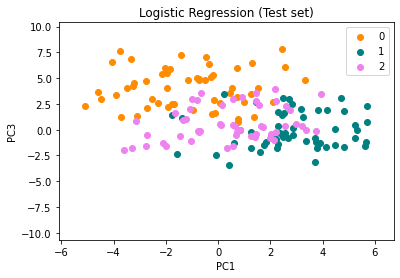

In [ ]:
X_set, y_set = x_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

#plt.contourf(X1,X2,
#             lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
#            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 2],
                c = ListedColormap(('darkorange', 'teal', 'violet'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend()
#plt.savefig("/content/drive/My Drive/wp1/scatter13_pca2.png", dpi=300)
plt.show()

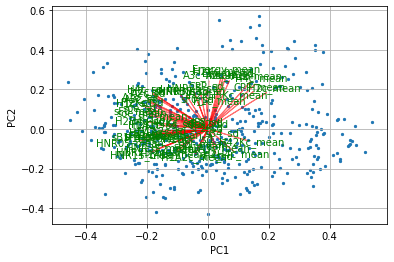

In [ ]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(x_train_pca[:,0:2], np.transpose(pca.components_[0:2,:]), list(x_train.columns))
plt.show()

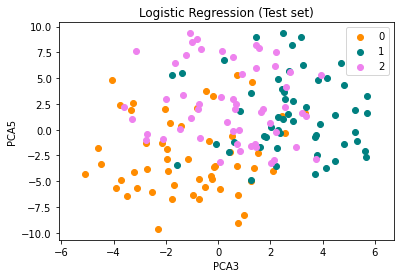

In [ ]:
#from matplotlib.colors import ListedColormap
X_set, y_set = x_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

#plt.contourf(X1,X2,
#             lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
#            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkorange', 'teal', 'violet'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA3')
plt.ylabel('PCA5')
plt.legend()
#plt.savefig("/content/drive/My Drive/wp1/scatter34_pca2.png", dpi=300)
plt.show()

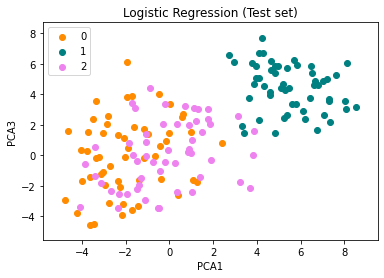

In [ ]:
#from matplotlib.colors import ListedColormap
X_set, y_set = x_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

#plt.contourf(X1,X2,
#             lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
#            alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkorange', 'teal', 'violet'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PCA1')
plt.ylabel('PCA3')
plt.legend()
#plt.savefig("/content/drive/My Drive/wp1/scatter13_pca2.png", dpi=300)
plt.show()

### Linear Discriminant Analysis I

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset.

LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes.

[Source](https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sessions = set(data['rs'].unique().tolist())

test_scores_lda = []
test_scores_lr =[]
f1 = []
Y_tests = []
Y_preds= []
eigen = []

for sp in tqdm(sessions):
  # define training and test sets
    train_sp = list(sessions.difference([sp]))
    train_data = data[data['rs'].isin(train_sp)]
    test_data = data[data['rs'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:64]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:64]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Apply LDA
    lda = LinearDiscriminantAnalysis()
    x_train_lda = lda.fit_transform(x_train_scaled, y_train)

    x_test_lda = lda.transform(x_test)

    # Initialize the logistic regression classifier
    # Train the classifier model
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=5000)
    lr.fit(x_train_lda,y_train)
    
    # Measure accuracy
    y_pred1 = lda.predict(x_test) #ida prediction
    y_pred2 = lr.predict(x_test_lda) #lr prediction

    test_scores_lda.append(accuracy_score(y_pred1, y_test))
    test_scores_lr.append(accuracy_score(y_pred2, y_test))
    
    f1.append(f1_score(y_test, y_pred2, average='macro'))

    Y_tests.extend(y_test)
    Y_preds.extend(y_pred2)

    idx = np.argsort(lda.coef_[0])

100%|██████████| 9/9 [00:02<00:00,  3.28it/s]


Test accuracy (LDA): 0.98
Test accuracy (LDA + LR): 0.98
0.9814379188479447
[0.9861111111111112, 1.0, 1.0, 0.9861111111111112, 1.0, 0.9722222222222222, 0.9861111111111112, 0.9722222222222222, 0.9583333333333334]
[0.9861111111111112, 0.9861111111111112, 0.9722222222222222, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9583333333333334]
1.0

Test confusion_matrix


Text(33.0, 0.5, 'True')

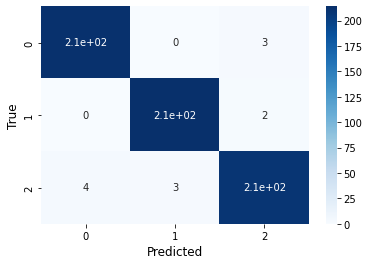

In [ ]:
# report accuracy
print("Test accuracy (LDA):", np.round(np.mean(test_scores_lda), 2))
print("Test accuracy (LDA + LR):", np.round(np.mean(test_scores_lr), 2))
print(np.mean(f1))
print(test_scores_lda)
print(test_scores_lr)
print(lda.explained_variance_ratio_.sum())

# Make the confusion matrix (aggregated)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_tests, Y_preds)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

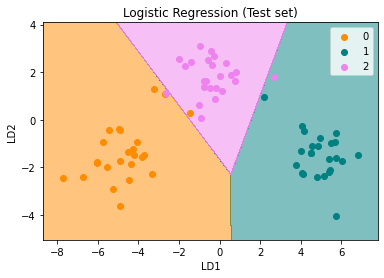

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_lda, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

plt.contourf(X1,X2,
             lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.5, cmap = ListedColormap(('darkorange', 'teal', 'violet')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(( 'darkorange', 'teal', 'violet'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
#plt.savefig("/content/drive/My Drive/wp1/lda1_test.png", dpi=300)
plt.show()

Coefficients: 
 [[-3.03245356 -0.02941438]
 [ 6.07691933  0.        ]
 [ 0.          2.64675245]]


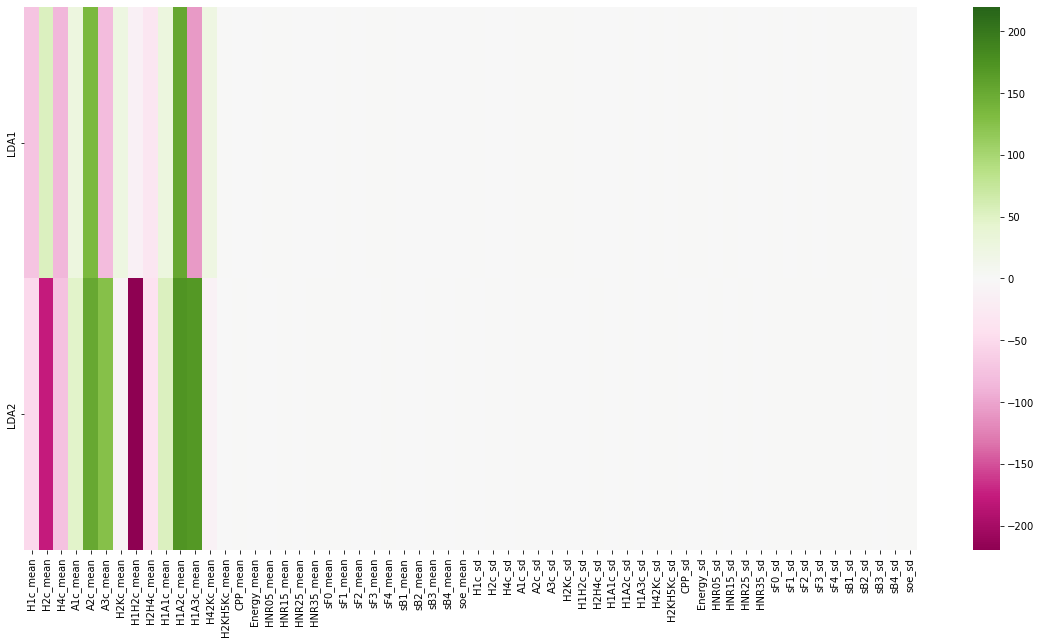

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)

fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(lda.scalings_.T,
                 cmap='PiYG',
                 norm=colors.Normalize(vmin=-220.,vmax=220.),
                 yticklabels=[ "LDA"+str(x) for x in range(1,3)],
                 xticklabels=list(x_train.columns))
                 #cbar_kws={"orientation": "horizontal"})
#ax.set_aspect("equal")
#fig.savefig("/content/drive/My Drive/wp1/heatmap_lda1.png", dpi=300)

### Linear Discriminant Analysis II

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset.

LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes.

[Source](https://stackabuse.com/implementing-lda-in-python-with-scikit-learn/)

[Guide](https://www.mltut.com/linear-discriminant-analysis-python-complete-and-easy-guide/)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

speakers = set(data['participant'].unique().tolist())

test_scores_lda = []
test_scores_lr=[]
f1 = []
Y_tests = []
Y_preds= []
eigen = []

for sp in tqdm(speakers):
  # define training and test sets
    train_sp = list(speakers.difference([sp]))
    train_data = data[data['participant'].isin(train_sp)]
    test_data = data[data['participant'] == sp]
    
    # Encoding of labels
    y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    x_train = train_data.iloc[:,4:64]
    
    y_test = test_data['phonation'].tolist()
    y_test = le.transform(y_test)
    
    x_test = test_data.iloc[:,4:64]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    x_train_scaled  = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Apply LDA
    lda = LinearDiscriminantAnalysis()
    x_train_lda = lda.fit_transform(x_train_scaled, y_train)

    x_test_lda = lda.transform(x_test)

    # Initialize the logistic regression model
    # Train the classifier model
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=5000)
    lr.fit(x_train_lda,y_train)
    
    # Measure accuracy
    y_pred1 = lda.predict(x_test)
    y_pred2 = lr.predict(x_test_lda)

    test_scores_lda.append(accuracy_score(y_pred1, y_test))
    test_scores_lr.append(accuracy_score(y_pred2, y_test))
    
    f1.append(f1_score(y_test, y_pred2, average='macro'))

    Y_tests.extend(y_test)
    Y_preds.extend(y_pred2)

    idx = np.argsort(lda.coef_[0])

100%|██████████| 4/4 [00:00<00:00,  4.39it/s]


Test accuracy (LDA): 0.84
Test accuracy (LDA + LR): 0.79
0.7701850317969695
[0.7345679012345679, 0.9259259259259259, 0.7901234567901234, 0.9259259259259259]
[0.7222222222222222, 0.8024691358024691, 0.7654320987654321, 0.8518518518518519]
1.0

Test confusion_matrix


Text(33.0, 0.5, 'True')

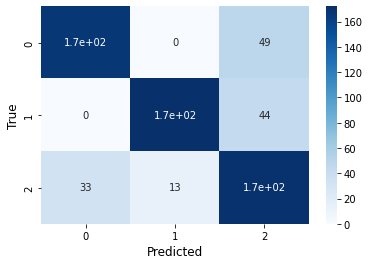

In [ ]:
# report accuracy
print("Test accuracy (LDA):", np.round(np.mean(test_scores_lda), 2))
print("Test accuracy (LDA + LR):", np.round(np.mean(test_scores_lr), 2))
print(np.mean(f1))
print(test_scores_lda)
print(test_scores_lr)
print(lda.explained_variance_ratio_.sum())

# Make the confusion matrix (aggregated)
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_tests, Y_preds)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

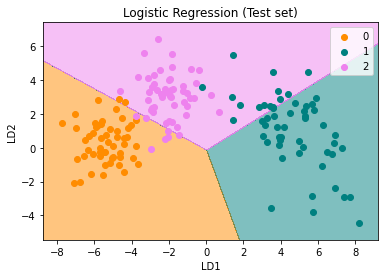

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_lda, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, 
                               step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, 
                               step = 0.01))

plt.contourf(X1,X2,
             lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.5, cmap = ListedColormap(('darkorange', 'teal', 'violet')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(( 'darkorange', 'teal', 'violet'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
#plt.savefig("/content/drive/My Drive/wp1/lda2_test.png", dpi=300)
plt.show()

Coefficients: 
 [[-4.18400492 -2.41634433]
 [ 3.09693628  0.        ]
 [ 0.          4.52132167]]


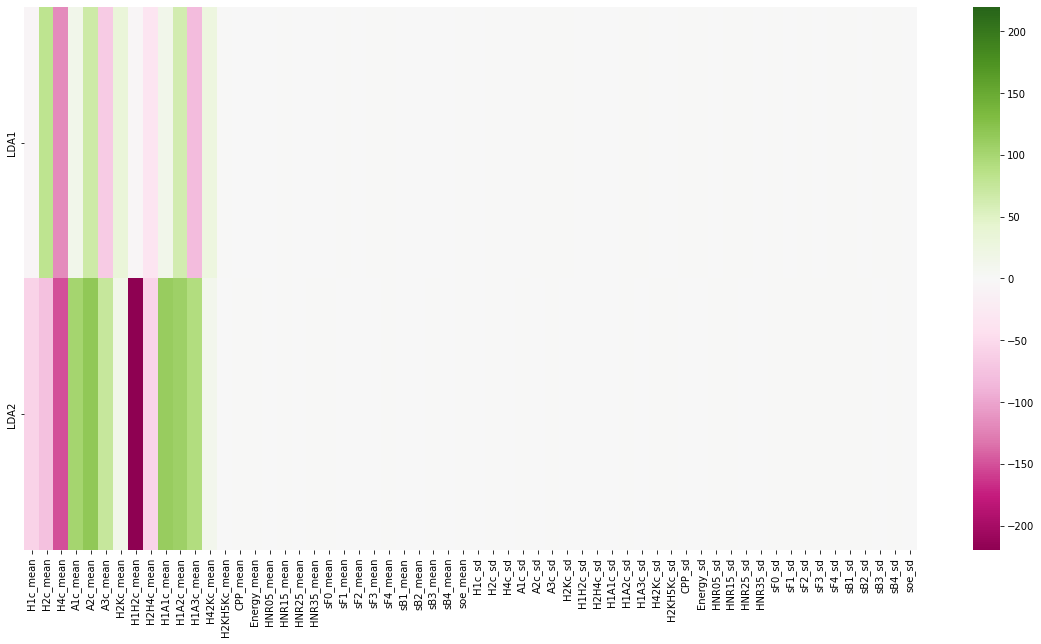

In [ ]:
# The coefficients
print('Coefficients: \n', lr.coef_)

import matplotlib.colors as colors
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(lda.scalings_.T,
                 cmap='PiYG',
                 norm=colors.Normalize(vmin=-220.,vmax=220.),
                 yticklabels=[ "LDA"+str(x) for x in range(1,3)],
                 xticklabels=list(x_train.columns))
                 #cbar_kws={"orientation": "horizontal"})
#ax.set_aspect("equal")
fig.savefig("/content/drive/My Drive/wp1/heatmap_lda2.png", dpi=300)

In [ ]:
lda.scalings_

array([[-6.38903532e+00, -5.74817738e+01],
       [ 8.16986209e+01, -7.59508767e+01],
       [-1.16980440e+02, -1.50443460e+02],
       [ 1.42738500e+01,  1.02671113e+02],
       [ 6.80187844e+01,  1.17999397e+02],
       [-6.67730216e+01,  7.46152096e+01],
       [ 3.28068533e+01,  1.62258075e+01],
       [-4.52792573e+00, -2.21145209e+02],
       [-3.57406425e+01, -5.63399764e+01],
       [ 1.42016704e+01,  1.13040291e+02],
       [ 6.32486461e+01,  1.07960632e+02],
       [-8.23976529e+01,  9.27596191e+01],
       [ 2.66654818e+01,  1.27904660e+01],
       [ 3.63445893e-01, -3.66815409e-01],
       [-5.64397442e-01,  1.15598749e+00],
       [-1.45485058e-01,  5.30038880e-01],
       [-5.38683676e-01, -2.17513381e-01],
       [ 4.83038353e-01,  1.16846588e+00],
       [-1.70462664e-01, -6.61528284e-01],
       [-7.70860712e-01,  5.12148829e-01],
       [-8.23091139e-01,  1.03887749e+00],
       [ 3.53752998e-01, -1.27353183e-01],
       [-1.90150730e-01, -5.53468487e-01],
       [ 2.

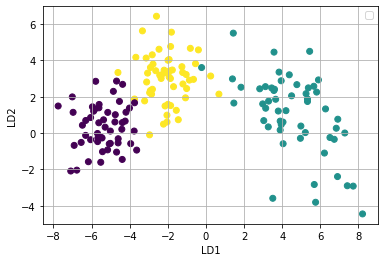

In [ ]:
# Some biplot and scatter plot attempts
# def bildaplot(score,coeff,labels=None):
    # xs = score[:,0]
    # ys = score[:,1]
    # n = coeff.shape[0]
    
    # plt.scatter(xs, ys, c=y_test)

    # for i in range(n):
    #     plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    #     if labels is None:
    #         plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), 
    #                  color = 'g', ha = 'center', va = 'center')
    #     else:
    #         plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], 
    #                  color = 'g', ha = 'center', va = 'center')

# xs = x_test_lda[:,0]
# ys = x_test_lda[:,1]
    
# plt.scatter(xs, ys, c=y_test)
# plt.xlabel("LD{}".format(1))
# plt.ylabel("LD{}".format(2))
# plt.grid()
# plt.legend()

# #Call the function. 
# # bildaplot(x_test_lda[:,0:2], lda.scalings_) #scales feel wrong.
# plt.savefig("/content/drive/My Drive/wp1/lda2.png", dpi=300)
# plt.show()

### Comparison of LDA and PCA 2D projection

explained variance ratio (first two components): [0.20262207 0.14816274]
explained variance ratio (first two components): [0.84205883 0.15794117]


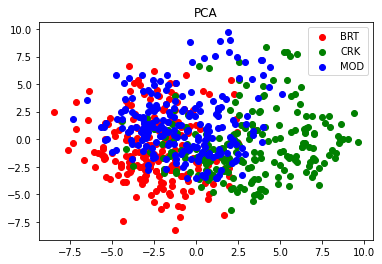

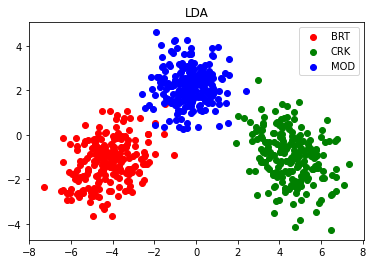

In [ ]:
# train and test set

x = data.iloc[:,4:64]
scaler = StandardScaler()
X = scaler.fit_transform(x)

y = data['phonation'].tolist()
le = LabelEncoder()
y = le.fit_transform(y)

target_names = le.classes_

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA')

plt.show()


## Combined feature set (not included in article)
**Combining** VoiceSauce and Opensmile data

In [ ]:
dvs = pd.read_csv('/content/drive/My Drive/wp1/vsdatas.csv', na_filter = False)
dos = pd.read_csv('/content/drive/My Drive/wp1/opensmile1-4funcs.csv', na_filter = False)
data = pd.merge(dvs, dos, on=['participant','session','repetition','phonation','comb_no'], 
                left_index=False, right_index=False, 
                how="outer")
data

participant                      Filename phonation   H1c_mean   H2c_mean  \
0         P0001  AC_P0001_S01_R01_BRT_HDM.mat       BRT  16.425432   5.149999   
1         P0001  AC_P0001_S01_R01_CRK_HDM.mat       CRK  13.142466  10.741680   
2         P0001  AC_P0001_S01_R01_MOD_HDM.mat       MOD  13.814134   7.490530   
3         P0001  AC_P0001_S01_R02_BRT_HDM.mat       BRT  14.824055   5.192939   
4         P0001  AC_P0001_S01_R02_CRK_HDM.mat       CRK  14.185648  12.096453   
..          ...                           ...       ...        ...        ...   
112       P0004  AC_P0004_S03_R02_CRK_HDM.mat       CRK  14.403799  11.561428   
113       P0004  AC_P0004_S03_R02_MOD_HDM.mat       MOD  16.753962  11.389900   
114       P0004  AC_P0004_S03_R03_BRT_HDM.mat       BRT  17.605715   6.205063   
115       P0004  AC_P0004_S03_R03_CRK_HDM.mat       CRK  12.654315   9.636426   
116       P0004  AC_P0004_S03_R03_MOD_HDM.mat       MOD  15.900629  10.546235   

     H4c_mean   A1c_mean   A2c_mean  A3c_mean  H2Kc_mean  ...  \
0   -1.754374 -15.304558 -14.625361 -5.760611  -3.765104  ...   
1    3.306533  -9.268425 -15.097425 -6.427032  -2.980318  ...   
2    0.251819  -9.497376 -14.923896 -5.244940  -2.523498  ...   
3   -0.332665 -11.515982 -11.647516 -3.783325  -2.726151  ...   
4    5.616025  -8.075565 -15.252716 -7.001800  -3.781944  ...   
..        ...        ...        ...       ...        ...  ...   
112  4.453420  -6.904047 -14.080556 -8.114757  -4.335758  ...   
113  4.531010  -6.086536 -11.474333 -4.162062  -0.862434  ...   
114 -0.576680 -14.470706 -17.842321 -9.860130  -7.101625  ...   
115  2.572714  -9.056556 -17.520300 -9.791619  -6.583420  ...   
116  2.681915  -8.103086 -13.164056 -6.177027  -1.827386  ...   

     slopeUV0-500_sma3nz_amean  slopeUV500-1500_sma3nz_amean  \
0                    -0.055642                      0.004372   
1                    -0.053462                      0.000241   
2                    -0.059919                      0.002522   
3                    -0.042710                     -0.000428   
4                    -0.055427                     -0.002846   
..                         ...                           ...   
112                  -0.067100                      0.000034   
113                  -0.054319                      0.000623   
114                  -0.057897                      0.001670   
115                  -0.067164                     -0.001297   
116                  -0.063104                      0.002309   

     spectralFluxUV_sma3nz_amean  loudnessPeaksPerSec  VoicedSegmentsPerSec  \
0                       0.082026             4.228687              2.304304   
1                       0.087053             4.819720              2.359012   
2                       0.085262             4.662439              2.017937   
3                       0.091031             3.932773              2.356902   
4                       0.094226             4.783841              2.094427   
..                           ...                  ...                   ...   
112                     0.066857             3.299024              1.427061   
113                     0.073302             3.504604              1.516954   
114                     0.053314             3.710938              1.536742   
115                     0.060492             3.163152              1.500417   
116                     0.068834             3.375404              1.824066   

     MeanVoicedSegmentLengthSec  StddevVoicedSegmentLengthSec  \
0                      0.248676                      0.202455   
1                      0.276406                      0.255706   
2                      0.320370                      0.248372   
3                      0.237143                      0.203429   
4                      0.311186                      0.293547   
..                          ...                           ...   
112                    0.487963                      0.414873   
113         

In [ ]:
# Rearrange the columns
data.insert(1, 'file', data.pop('file'))
data.insert(4, 'start', data.pop('start'))
data.insert(5, 'end', data.pop('end'))
data.insert(1, 'session', data.pop('session'))
data.insert(2, 'repetition', data.pop('repetition'))
data.insert(3, 'comb_no', data.pop('comb_no'))
data.insert(4, 'phonation', data.pop('phonation'))
data

participant session repetition comb_no phonation  \
0         P0001     S01        R01  S01R01       BRT   
1         P0001     S01        R01  S01R01       CRK   
2         P0001     S01        R01  S01R01       MOD   
3         P0001     S01        R02  S01R02       BRT   
4         P0001     S01        R02  S01R02       CRK   
..          ...     ...        ...     ...       ...   
112       P0004     S03        R02  S03R02       CRK   
113       P0004     S03        R02  S03R02       MOD   
114       P0004     S03        R03  S03R03       BRT   
115       P0004     S03        R03  S03R03       CRK   
116       P0004     S03        R03  S03R03       MOD   

                                                  file  \
0    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
1    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
2    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
3    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
4    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
..                                                 ...   
112  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
113  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
114  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
115  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
116  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   

                         Filename   start                        end  \
0    AC_P0001_S01_R01_BRT_HDM.mat  0 days  0 days 00:00:29.577208333   
1    AC_P0001_S01_R01_CRK_HDM.mat  0 days     0 days 00:00:27.197750   
2    AC_P0001_S01_R01_MOD_HDM.mat  0 days  0 days 00:00:26.828604167   
3    AC_P0001_S01_R02_BRT_HDM.mat  0 days     0 days 00:00:29.761750   
4    AC_P0001_S01_R02_CRK_HDM.mat  0 days  0 days 00:00:28.230791667   
..                            ...     ...                        ...   
112  AC_P0004_S03_R02_CRK_HDM.mat  0 days  0 days 00:00:37.903666667   
113  AC_P0004_S03_R02_MOD_HDM.mat  0 days  0 days 00:00:33.685812500   
114  AC_P0004_S03_R03_BRT_HDM.mat  0 days  0 days 00:00:35.859729167   
115  AC_P0004_S03_R03_CRK_HDM.mat  0 days  0 days 00:00:36.052770833   
116  AC_P0004_S03_R03_MOD_HDM.mat  0 days  0 days 00:00:34.081312500   

      H1c_mean  ...  slopeUV0-500_sma3nz_amean  slopeUV500-1500_sma3nz_amean  \
0    16.425432  ...                  -0.055642                      0.004372   
1    13.142466  ...                  -0.053462                      0.000241   
2    13.814134  ...                  -0.059919                      0.002522   
3    14.824055  ...                  -0.042710                     -0.000428   
4    14.185648  ...                  -0.055427                     -0.002846   
..         ...  ...                        ...                           ...   
112  14.403799  ...                  -0.067100                      0.000034   
113  16.753962  ...                  -0.054319                      0.000623   
114  17.605715  ...                  -0.057897                      0.001670   
115  12.654315  ...                  -0.067164                     -0.001297   
116  15.900629  ...                  -0.063104                      0.002309   

     spectralFluxUV_sma3nz_amean  loudnessPeaksPerSec  VoicedSegmentsPerSec  \
0                       0.082026             4.228687              2.304304   
1                       0.087053             4.819720              2.359012   
2                       0.085262             4.662439              2.017937   
3                       0.091031             3.932773              2.356902   
4                       0.094226             4.783841              2.094427   
..                           ...                  ...                   ...   
112                     0.066857             3.299024              1.427061   
113                     0.073302             3.504604              1.516954   
114                     0.053314             3.710938              1.536742   
115               

In [ ]:
# average duration of audios
dur = data['end'].str.replace("0 days 00:00:","")
dur = pd.to_numeric(dur)
print(dur.mean())
print(dur.std(ddof=1))

29.040706908803415
3.7739142851002523


In [ ]:
# See all column names
print(data.columns.tolist())

['participant', 'session', 'repetition', 'comb_no', 'phonation', 'file', 'Filename', 'start', 'end', 'H1c_mean', 'H2c_mean', 'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H2Kc_mean', 'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'H42Kc_mean', 'H2KH5Kc_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'sF0_mean', 'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'sB1_mean', 'sB2_mean', 'sB3_mean', 'sB4_mean', 'H1c_sd', 'H2c_sd', 'H4c_sd', 'A1c_sd', 'A2c_sd', 'A3c_sd', 'H2Kc_sd', 'H1H2c_sd', 'H2H4c_sd', 'H1A1c_sd', 'H1A2c_sd', 'H1A3c_sd', 'H42Kc_sd', 'H2KH5Kc_sd', 'CPP_sd', 'Energy_sd', 'HNR05_sd', 'HNR15_sd', 'HNR25_sd', 'HNR35_sd', 'sF0_sd', 'sF1_sd', 'sF2_sd', 'sF3_sd', 'sF4_sd', 'sB1_sd', 'sB2_sd', 'sB3_sd', 'sB4_sd', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_perce

In [ ]:
# Drop some columns 
drop_os=[ 
 'F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'HNRdBACF_sma3nz_amean',
 'HNRdBACF_sma3nz_stddevNorm','logRelF0-H1-H2_sma3nz_amean',
 'logRelF0-H1-H2_sma3nz_stddevNorm',
 'logRelF0-H1-A3_sma3nz_amean',
 'logRelF0-H1-A3_sma3nz_stddevNorm',
 'F1frequency_sma3nz_amean',
 'F1frequency_sma3nz_stddevNorm',
 'F1bandwidth_sma3nz_amean',
 'F1bandwidth_sma3nz_stddevNorm',
 'F2frequency_sma3nz_amean',
 'F2frequency_sma3nz_stddevNorm',
 'F2bandwidth_sma3nz_amean',
 'F2bandwidth_sma3nz_stddevNorm',
 'F3frequency_sma3nz_amean',
 'F3frequency_sma3nz_stddevNorm',
 'F3bandwidth_sma3nz_amean',
 'F3bandwidth_sma3nz_stddevNorm',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_sma3_amean',
 'mfcc4_sma3_stddevNorm']
data.drop(drop_os, axis=1)

participant session repetition comb_no phonation  \
0         P0001     S01        R01  S01R01       BRT   
1         P0001     S01        R01  S01R01       CRK   
2         P0001     S01        R01  S01R01       MOD   
3         P0001     S01        R02  S01R02       BRT   
4         P0001     S01        R02  S01R02       CRK   
..          ...     ...        ...     ...       ...   
112       P0004     S03        R02  S03R02       CRK   
113       P0004     S03        R02  S03R02       MOD   
114       P0004     S03        R03  S03R03       BRT   
115       P0004     S03        R03  S03R03       CRK   
116       P0004     S03        R03  S03R03       MOD   

                                                  file  \
0    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
1    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
2    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
3    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
4    /content/drive/My Drive/wp1/P0001/AC_P0001_S01...   
..                                                 ...   
112  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
113  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
114  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
115  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   
116  /content/drive/My Drive/wp1/P0004/AC_P0004_S03...   

                         Filename   start                        end  \
0    AC_P0001_S01_R01_BRT_HDM.mat  0 days  0 days 00:00:29.577208333   
1    AC_P0001_S01_R01_CRK_HDM.mat  0 days     0 days 00:00:27.197750   
2    AC_P0001_S01_R01_MOD_HDM.mat  0 days  0 days 00:00:26.828604167   
3    AC_P0001_S01_R02_BRT_HDM.mat  0 days     0 days 00:00:29.761750   
4    AC_P0001_S01_R02_CRK_HDM.mat  0 days  0 days 00:00:28.230791667   
..                            ...     ...                        ...   
112  AC_P0004_S03_R02_CRK_HDM.mat  0 days  0 days 00:00:37.903666667   
113  AC_P0004_S03_R02_MOD_HDM.mat  0 days  0 days 00:00:33.685812500   
114  AC_P0004_S03_R03_BRT_HDM.mat  0 days  0 days 00:00:35.859729167   
115  AC_P0004_S03_R03_CRK_HDM.mat  0 days  0 days 00:00:36.052770833   
116  AC_P0004_S03_R03_MOD_HDM.mat  0 days  0 days 00:00:34.081312500   

      H1c_mean  ...  slopeUV0-500_sma3nz_amean  slopeUV500-1500_sma3nz_amean  \
0    16.425432  ...                  -0.055642                      0.004372   
1    13.079492  ...                  -0.053462                      0.000241   
2    13.814134  ...                  -0.059919                      0.002522   
3    14.791663  ...                  -0.042710                     -0.000428   
4    14.163647  ...                  -0.055427                     -0.002846   
..         ...  ...                        ...                           ...   
112  14.403799  ...                  -0.067100                      0.000034   
113  16.753962  ...                  -0.054319                      0.000623   
114  17.598709  ...                  -0.057897                      0.001670   
115  12.654315  ...                  -0.067164                     -0.001297   
116  15.900629  ...                  -0.063104                      0.002309   

     spectralFluxUV_sma3nz_amean  loudnessPeaksPerSec  VoicedSegmentsPerSec  \
0                       0.082026             4.228687              2.304304   
1                       0.087053             4.819720              2.359012   
2                       0.085262             4.662439              2.017937   
3                       0.091031             3.932773              2.356902   
4                       0.094226             4.783841              2.094427   
..                           ...                  ...                   ...   
112                     0.066857             3.299024              1.427061   
113                     0.073302             3.504604              1.516954   
114                     0.053314             3.710938              1.536742   
115               

In [ ]:
data.to_csv('/content/drive/My Drive/wp1/com_data.csv', index=None)

### Full model (multicollinearity)

In [ ]:
# full feature set

sessions = set(data['comb_no'].unique().tolist())

scores = []
f1 = []
pos_variables = []
neg_variables = []

for sp in tqdm(sessions):
  # define training and test sets
    train_sp = list(sessions.difference([sp]))
    train_data = data[data['comb_no'].isin(train_sp)]
    test_data = data[data['comb_no']==sp]
    
    # Encoding of labels
    Y_train = train_data['phonation'].tolist()
    le = LabelEncoder()
    Y_train = le.fit_transform(Y_train)

    X_train = train_data.iloc[:,9:117]
    
    Y_test = test_data['phonation'].tolist()
    Y_test = le.transform(Y_test)
    
    X_test = test_data.iloc[:,9:117]
    
    # Standardize features by removing the mean and scaling to unit variance.

    scaler = StandardScaler()
    X_train_scaled  = scaler.fit_transform(X_train)
    
    lr = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',C=10,max_iter=2000)
    lr.fit(X_train_scaled,Y_train)
    
    X_test = scaler.transform(X_test)
    scores.append(lr.score(X_test,Y_test))
    
    preds = lr.predict(X_test)
    f1.append(f1_score(Y_test,preds,average='macro'))
    
    idx = np.argsort(lr.coef_[0])
    pos_variables.append((X_train.columns[idx[-10:]].tolist(),np.sort(lr.coef_[0][idx[-10:]])))
    neg_variables.append((X_train.columns[idx[0:10]].tolist(),np.sort(lr.coef_[0][idx[0:10]])))

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
  8%|▊         | 1/12 [00:00<00:09,  1.14it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 17%|█▋        | 2/12 [00:01<00:08,  1.23it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 25%|██▌       | 3/12 [00:02<00:07,  1.26it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
 33%|███▎      | 4/12 [00:03<00:06,  1.28it/s]/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: Convergen

In [ ]:
print(np.mean(scores))
print(np.mean(f1))

1.0
1.0


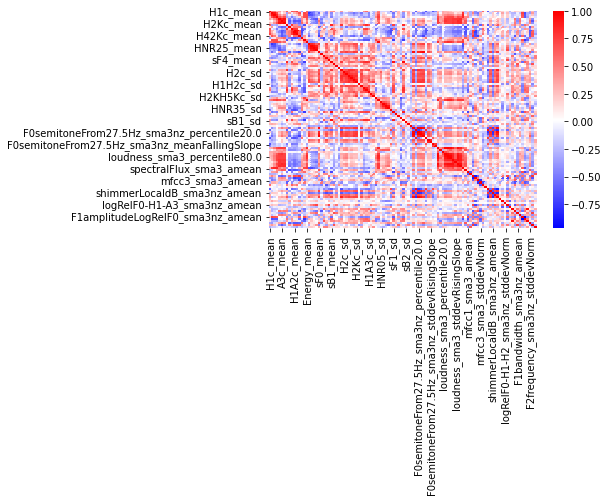

In [ ]:
sns.heatmap(X_train.corr(), cmap = 'bwr')

In [ ]:
pos_variables

[(['F1amplitudeLogRelF0_sma3nz_stddevNorm',
   'H2H4c_sd',
   'H1H2c_mean',
   'sB1_sd',
   'H1A1c_mean',
   'H1A2c_sd',
   'H1A1c_sd',
   'H1H2c_sd',
   'sF1_sd',
   'sB1_mean'],
  array([0.14946451, 0.18535162, 0.22830846, 0.30153633, 0.44346219,
         0.47370005, 0.47875329, 0.54275334, 0.54506196, 0.95653472])),
 (['H2H4c_sd',
   'F1amplitudeLogRelF0_sma3nz_stddevNorm',
   'H1H2c_mean',
   'sB1_sd',
   'H1A2c_sd',
   'H1A1c_sd',
   'sF1_sd',
   'H1A1c_mean',
   'H1H2c_sd',
   'sB1_mean'],
  array([0.14659837, 0.21434797, 0.22780845, 0.22961591, 0.35466906,
         0.39544233, 0.49070678, 0.50892153, 0.59053911, 0.90107841])),
 (['F1amplitudeLogRelF0_sma3nz_stddevNorm',
   'H2H4c_sd',
   'H1H2c_mean',
   'sB1_sd',
   'H1A1c_sd',
   'H1A1c_mean',
   'H1A2c_sd',
   'sF1_sd',
   'H1H2c_sd',
   'sB1_mean'],
  array([0.20052312, 0.23586722, 0.24429068, 0.32015241, 0.42255104,
         0.46246004, 0.46714543, 0.49375374, 0.53203742, 0.92908039])),
 (['H2H4c_sd',
   'F1amplitudeLogRelF

In [ ]:
neg_variables

[(['mfcc1_sma3_amean',
   'sF2_sd',
   'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
   'HNR05_sd',
   'shimmerLocaldB_sma3nz_amean',
   'sF0_sd',
   'F1amplitudeLogRelF0_sma3nz_amean',
   'sB2_sd',
   'loudness_sma3_meanRisingSlope',
   'HNR35_mean'],
  array([-0.44297849, -0.39240058, -0.33170551, -0.28845043, -0.25007928,
         -0.18447656, -0.15340135, -0.0143297 , -0.01072748, -0.00951651])),
 (['sF2_sd',
   'mfcc1_sma3_amean',
   'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
   'shimmerLocaldB_sma3nz_amean',
   'F1amplitudeLogRelF0_sma3nz_amean',
   'sF0_sd',
   'HNR05_sd',
   'loudness_sma3_meanRisingSlope',
   'sF4_sd',
   'loudness_sma3_stddevRisingSlope'],
  array([-0.45844992, -0.45073872, -0.43184895, -0.2418072 , -0.21037039,
         -0.19272285, -0.13255871, -0.08374159,  0.        ,  0.        ])),
 (['mfcc1_sma3_amean',
   'sF2_sd',
   'HNR05_sd',
   'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
   'shimmerLocaldB_sma3nz_amean',
   'F1amplitudeLogRelF0_sma3nz_

### PCA model

The data size is too small for combined feature set. The following part is not analysed until I have more data.

